## Goal

Detection of anomalies in the Stock Market

Backtesting provided


**IBEX35:** AENA, BBVA, ENDESA, IBERDROLA, INDRA, INDITEX, MERLIN, NATURGY, REPSOL, TELEFONICA.


**NASDAQ100:** APPLE, AIRBNB, AMAZON, ELECTRONIC ARTS, LULULEMON ATHLETICA, MONSTER, MICROSOFT, NETFLIX, NVIDIA, PEPSICO, STARBUCKS, TESLA, WARNER.


In [2]:
assets=['AAPL', 'ABNB', 'AENA.MC', 'AMZN', 'BBVA.MC', 'EA', 'ELE.MC', 'IBE.MC',
       'IDR.MC', 'ITX.MC', 'LULU', 'MNST', 'MRL.MC', 'MSFT', 'NFLX', 'NTGY.MC',
       'NVDA', 'PEP', 'REP.MC', 'SBUX', 'TEF.MC', 'TSLA', 'WBD']

In [3]:
len(assets)

23

In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)
import sklearn

In [5]:
df=pd.read_pickle("historico_desde_2022_challenge_s3_plus.pkl")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 532 entries, 2022-01-03 to 2024-01-23
Columns: 138 entries, ('Adj Close', 'AAPL') to ('Volume', 'WBD')
dtypes: float64(138)
memory usage: 577.7 KB


In [7]:
df.tail()

Adj Close                                              \
                  AAPL        ABNB     AENA.MC        AMZN BBVA.MC   
Date                                                                 
2024-01-17  182.679993  134.979996  161.750000  151.710007   8.094   
2024-01-18  188.630005  137.039993  163.600006  153.500000   8.084   
2024-01-19  191.559998  139.929993  163.350006  155.339996   7.996   
2024-01-22  193.889999  142.009995  165.149994  154.779999   8.172   
2024-01-23         NaN         NaN  161.500000         NaN   8.118   

                                                             ...      Volume  \
                    EA     ELE.MC  IBE.MC IDR.MC     ITX.MC  ...        MSFT   
Date                                                         ...               
2024-01-17  136.619995  19.379999  11.450  15.65  38.419998  ...  22234100.0   
2024-01-18  138.029999  19.045000  11.265  15.80  38.630001  ...  23392100.0   
2024-01-19  137.720001  18.655001  11.220  15.67  38.869999  ...  29272000.0   
2024-01-22  137.570007  18.760000  11.260  15.91  39.119999  ...  26880900.0   
2024-01-23         NaN  18.645000  11.125  15.77  38.759998  ...         NaN   

                                                                              \
                 NFLX   NTGY.MC        NVDA        PEP     REP.MC       SBUX   
Date                                                                           
2024-01-17  4894600.0  383173.0  47439400.0  4392300.0  3344119.0  6672900.0   
2024-01-18  4054400.0  346938.0  49165000.0  4709400.0  3692971.0  7549500.0   
2024-01-19  5665600.0  383203.0  54210300.0  6506700.0  3292386.0  9556100.0   
2024-01-22  5100500.0  545974.0  45213100.0  5696900.0  3479627.0  9420100.0   
2024-01-23        NaN   85520.0         NaN        NaN   760153.0        NaN   

                                                 
                TEF.MC         TSLA         WBD  
Date                                             
2024-01-17   8983682.0  103164400.0  15385300.0  
2024-01-18   6450410.0  108595400.0  13386600.0  
2024-01-19  33002429.0  102095800.0  18338900.0  
2024-01-22   6941318.0  117726800.0  14254300.0  
2024-01-23   2147456.0          NaN         NaN  

[5 rows x 138 columns]

In [8]:
df['Close'].columns

Index(['AAPL', 'ABNB', 'AENA.MC', 'AMZN', 'BBVA.MC', 'EA', 'ELE.MC', 'IBE.MC',
       'IDR.MC', 'ITX.MC', 'LULU', 'MNST', 'MRL.MC', 'MSFT', 'NFLX', 'NTGY.MC',
       'NVDA', 'PEP', 'REP.MC', 'SBUX', 'TEF.MC', 'TSLA', 'WBD'],
      dtype='object')

In [9]:
df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23'],
              dtype='datetime64[ns]', name='Date', length=532, freq=None)

Since our strategy is about finding anomalies, I didn't overcomplicate things and filled all the NaN values with the previous day's value. Potential issues:

The market might not have opened that day, but we don't mind because the price will remain the same as the previous day.
The volume should be 0 for those holidays, and also, buying or selling on those days is not possible. Since the strategy focuses on finding anomalies, we should create a function to check if it's Saturday or Sunday and account for those days as well. If there is an anomaly on Friday and it continues on Monday, it will count as two consecutive days with an anomaly and not four, by including Saturday and Sunday. We'll also consider holidays for IBEX and Nasdaq.



In [10]:
df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23'],
              dtype='datetime64[ns]', name='Date', length=532, freq=None)

In [11]:
dias_semana = df.index.weekday
df['Dia_Laboral'] = dias_semana < 5

Days Off https://www.meff.es/ing/Trading-Calendar y https://www.nasdaq.com/market-activity/stock-market-holiday-schedule

In [12]:
festivos_nasdaq = [
    '2022-01-01', '2022-01-15', '2022-02-19', '2022-03-29', '2022-05-27',
    '2022-06-19', '2022-07-04', '2022-09-02', '2022-11-28', '2022-12-25',
    '2023-01-01', '2023-01-15', '2023-02-19', '2023-03-29', '2023-05-27',
    '2023-06-19', '2023-07-04', '2023-09-02', '2023-11-28', '2023-12-25',
    '2024-01-01', '2024-01-15', '2024-02-19', '2024-03-29', '2024-05-27',
    '2024-06-19', '2024-07-04', '2024-09-02', '2024-11-28', '2024-12-25'
]
df['festivos_Nasdaq'] = df.index.isin(festivos_nasdaq)

festivos_ibex = [
    '2022-04-15', '2022-04-18', '2022-12-26', '2023-04-07', '2023-04-10',
    '2023-05-01', '2023-12-25', '2023-12-26', '2024-01-01', '2024-02-29',
    '2024-04-01', '2024-05-01', '2024-12-25', '2024-12-26'
]

df['festivos_IBEX'] = df.index.isin(festivos_ibex)

In [13]:
df.fillna(method="ffill", inplace=True)

In [14]:
df.columns.get_level_values(1).unique()[:-1]

Index(['AAPL', 'ABNB', 'AENA.MC', 'AMZN', 'BBVA.MC', 'EA', 'ELE.MC', 'IBE.MC',
       'IDR.MC', 'ITX.MC', 'LULU', 'MNST', 'MRL.MC', 'MSFT', 'NFLX', 'NTGY.MC',
       'NVDA', 'PEP', 'REP.MC', 'SBUX', 'TEF.MC', 'TSLA', 'WBD'],
      dtype='object')

For this exercise, we'll use Close, although I find Adj Close more interesting because it accounts for any type of corporate actions. If a stock split occurs, I understand that the price would "drop," correct?

We define 1 as a selling opportunity and -1 as a buying opportunity. If it's 0, we maintain a neutral position.

In [15]:
def bollinger(df, ventana=20, desviacion=2):
    df_resultado = df.copy()

    for empresa in df.columns.get_level_values(1).unique()[:-1]:
        media = df[('Close', empresa)].rolling(window=ventana).mean()
        desviacion_estandar = df[('Close', empresa)].rolling(window=ventana).std()
        banda_superior = media + (desviacion_estandar * desviacion)
        banda_inferior = media - (desviacion_estandar * desviacion)


        df_resultado[('media', empresa)] = media
        df_resultado[('banda_superior', empresa)] = banda_superior
        df_resultado[('banda_inferior', empresa)] = banda_inferior

        señal = pd.Series(index=df.index, dtype=int)
        for i in range(len(df)):
            if df[('Close', empresa)].iloc[i] > banda_superior.iloc[i]:
                señal.iloc[i] = 1
            elif df[('Close', empresa)].iloc[i] < banda_inferior.iloc[i]:
                señal.iloc[i] = -1
            else:
                señal.iloc[i] = 0
        df_resultado[('señal', empresa)] = señal

    return df_resultado

df_resultado = bollinger(df)
df_resultado

Adj Close                                                \
                  AAPL        ABNB     AENA.MC        AMZN   BBVA.MC   
Date                                                                   
2022-01-03  179.953888  172.679993  137.782410  170.404495  4.575069   
2022-01-04  177.669983  170.800003  139.962509  167.522003  4.690751   
2022-01-05  172.943985  162.250000  141.173676  164.356995  4.679443   
2022-01-06  170.056946  159.750000  141.464355  163.253998  4.747287   
2022-01-07  170.225067  166.050003  139.914062  162.554001  4.859488   
...                ...         ...         ...         ...       ...   
2024-01-17  182.679993  134.979996  161.750000  151.710007  8.094000   
2024-01-18  188.630005  137.039993  163.600006  153.500000  8.084000   
2024-01-19  191.559998  139.929993  163.350006  155.339996  7.996000   
2024-01-22  193.889999  142.009995  165.149994  154.779999  8.172000   
2024-01-23  193.889999  142.009995  161.500000  154.779999  8.118000   

                                                                    ...  \
                    EA     ELE.MC     IBE.MC     IDR.MC     ITX.MC  ...   
Date                                                                ...   
2022-01-03  133.363464  17.325710   9.401367   9.131916  26.788313  ...   
2022-01-04  134.163956  17.377224   9.347362   9.032501  26.648111  ...   
2022-01-05  132.226990  16.990873   9.284356   9.108245  26.601374  ...   
2022-01-06  128.165314  16.771940   9.225850   9.023033  26.423782  ...   
2022-01-07  130.230713  16.647448   9.230352   8.942554  25.853619  ...   
...                ...        ...        ...        ...        ...  ...   
2024-01-17  136.619995  19.379999  11.450000  15.650000  38.419998  ...   
2024-01-18  138.029999  19.045000  11.265000  15.800000  38.630001  ...   
2024-01-19  137.720001  18.655001  11.220000  15.670000  38.869999  ...   
2024-01-22  137.570007  18.760000  11.260000  15.910000  39.119999  ...   
2024-01-23  137.570007  18.645000  11.125000  15.770000  38.759998  ...   

           banda_inferior  señal       media banda_superior banda_inferior  \
                   TEF.MC TEF.MC        TSLA           TSLA           TSLA   
Date                                                                         
2022-01-03            NaN    0.0         NaN            NaN            NaN   
2022-01-04            NaN    0.0         NaN            NaN            NaN   
2022-01-05            NaN    0.0         NaN            NaN            NaN   
2022-01-06            NaN    0.0         NaN            NaN            NaN   
2022-01-07            NaN    0.0         NaN            NaN            NaN   
...                   ...    ...         ...            ...            ...   
2024-01-17       3.503131    0.0  240.160499     268.806786     211.514211   
2024-01-18       3.515750    0.0  237.893499     267.994628     207.792370   
2024-01-19       3.513507    0.0  236.145999     267.994216     204.297782   
2024-01-22       3.514409    0.0  233.860999     266.706657     201.015341   
2024-01-23       3.522701    0.0  231.674000     265.102530     198.245470   

           señal    media banda_superior banda_inferior señal  
            TSLA      WBD            WBD            WBD   WBD  
Date                                                           
2022-01-03   0.0      NaN            NaN            NaN   0.0  
2022-01-04   0.0      NaN            NaN            NaN   0.0  
2022-01-05   0.0      NaN            NaN            NaN   0.0  
2022-01-06   0.0      NaN            NaN            NaN   0.0  
2022-01-07   0.0      NaN            NaN            NaN   0.0  
...          ...      ...            ...            ...   ...  
2024-01-17   0.0  11.2050      12.261598      10.148402   0.0  
2024-01-18   0.0  11.1010      12.085958      10.116041   0.0  
2024-01-19   0.0  11.0355      12.038012      10.032988   0.0  
2024-01-22   0.0  10.9845      11.993418       9.975582   0.0  
2024-01-23   0.0  10.9445   

In [16]:
empresas=df_resultado['Close'].columns.to_list()
empresas_americanas = [empresa for empresa in empresas if ".MC" not in empresa]
empresas_españolas = [empresa for empresa in empresas if ".MC" in empresa]

Representamos las anomalías, para que se "vea" cada una multiplico el precio de cierre por la señal

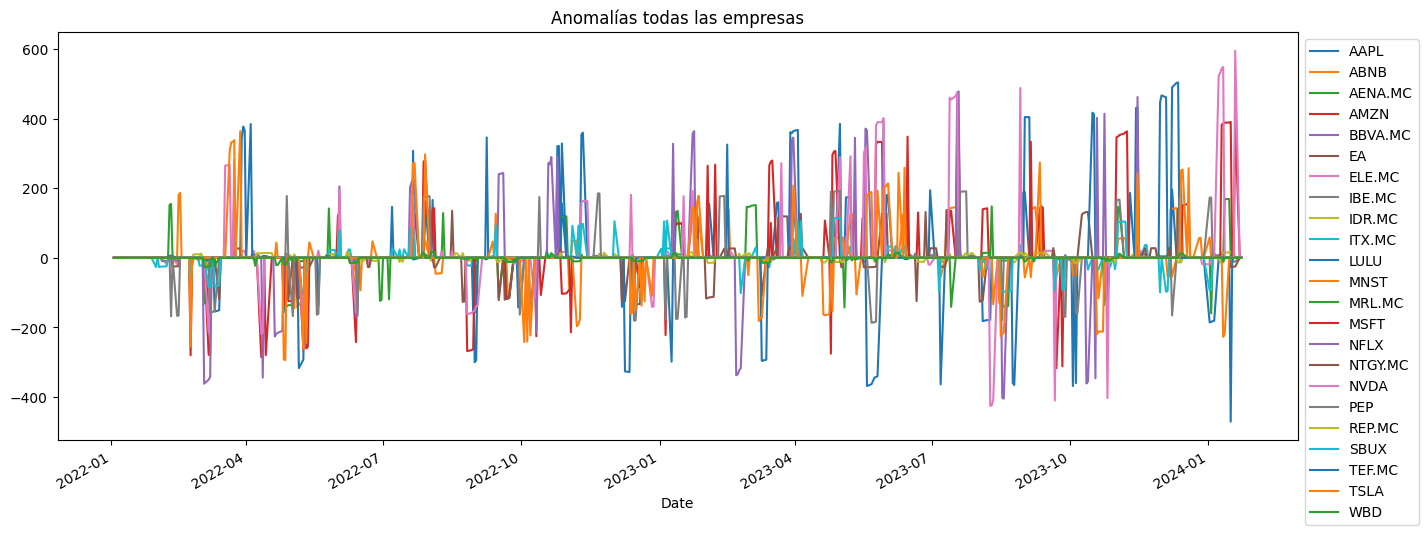

In [ ]:
(df_resultado['señal']*df_resultado['Close']).plot()
plt.title("Anomalías todas las empresas")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Vamos a normalizar para observar mejor todas las anomalías

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df_resultado['Close'])
df_resultado_close_norm = pd.DataFrame(scaled_data, index=df_resultado.index, columns=df_resultado['Close'].columns)
df_resultado_close_norm

,AAPL,ABNB,AENA.MC,AMZN,BBVA.MC,EA,ELE.MC,IBE.MC,IDR.MC,ITX.MC,...,MSFT,NFLX,NTGY.MC,NVDA,PEP,REP.MC,SBUX,TEF.MC,TSLA,WBD
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.985472,2.216286,0.241510,2.098307,-0.695323,1.167540,1.111273,-0.431500,-0.690543,0.063918,...,0.937329,2.667262,1.271066,0.138766,-0.158290,-2.423056,2.285611,-0.228621,2.931256,1.909078
2022-01-04,0.857028,2.128686,0.404505,1.966562,-0.587588,1.284017,1.161205,-0.520143,-0.743467,0.037785,...,0.804967,2.602342,1.193462,0.074322,-0.128272,-2.216976,2.037702,-0.240804,2.625364,2.171899
2022-01-05,0.591241,1.730291,0.495057,1.821904,-0.598118,1.002172,0.786717,-0.623562,-0.703144,0.029074,...,0.513723,2.355708,1.221682,-0.056427,-0.057427,-1.980490,1.651615,-0.252987,2.250725,2.116373
2022-01-06,0.428878,1.613801,0.516790,1.771491,-0.534935,0.411158,0.574506,-0.719593,-0.748507,-0.004028,...,0.456074,2.207184,1.320450,-0.011913,-0.052625,-2.004139,1.722736,-0.106788,2.107988,1.981261
2022-01-07,0.438331,1.907356,0.400882,1.739498,-0.430440,0.711697,0.453837,-0.712206,-0.791351,-0.110303,...,0.459763,2.079535,1.207572,-0.084112,-0.026208,-2.267652,1.360018,-0.098259,1.877976,2.784530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,1.022727,0.459620,1.657754,1.243869,1.600338,1.407684,0.445514,1.053291,2.336191,1.764310,...,2.199156,1.445676,-0.485609,2.149787,-0.943571,-0.390125,-0.245292,-0.434519,-0.439887,-0.898660
2024-01-18,1.353571,0.555608,1.791772,1.325681,1.592237,1.610442,0.166729,0.779973,2.411797,1.800897,...,2.300619,1.497654,-0.753696,2.231524,-0.855918,-0.242322,-0.085778,-0.527112,-0.506989,-0.876450
2024-01-19,1.516489,0.690270,1.773662,1.409779,1.520953,1.565864,-0.157828,0.713489,2.346272,1.842709,...,2.411306,1.473022,-1.064113,2.416403,-1.022820,-0.436578,-0.032944,-0.412589,-0.501321,-0.863494


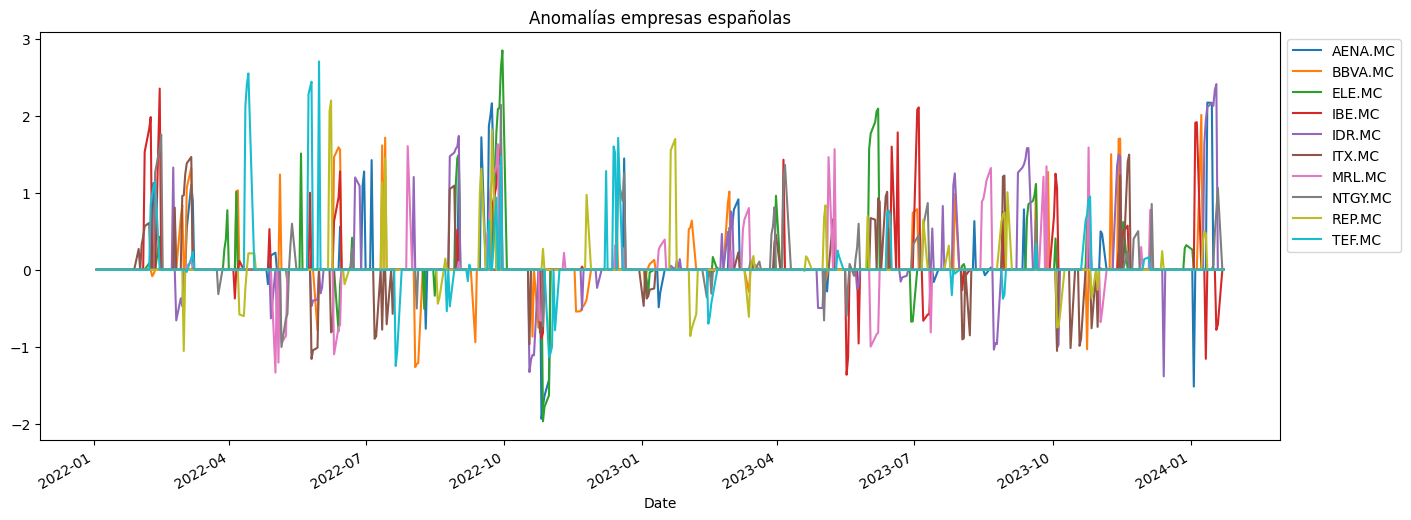

In [ ]:
(df_resultado['señal'][empresas_españolas]*df_resultado_close_norm[empresas_españolas]).plot()
plt.title("Anomalías empresas españolas")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

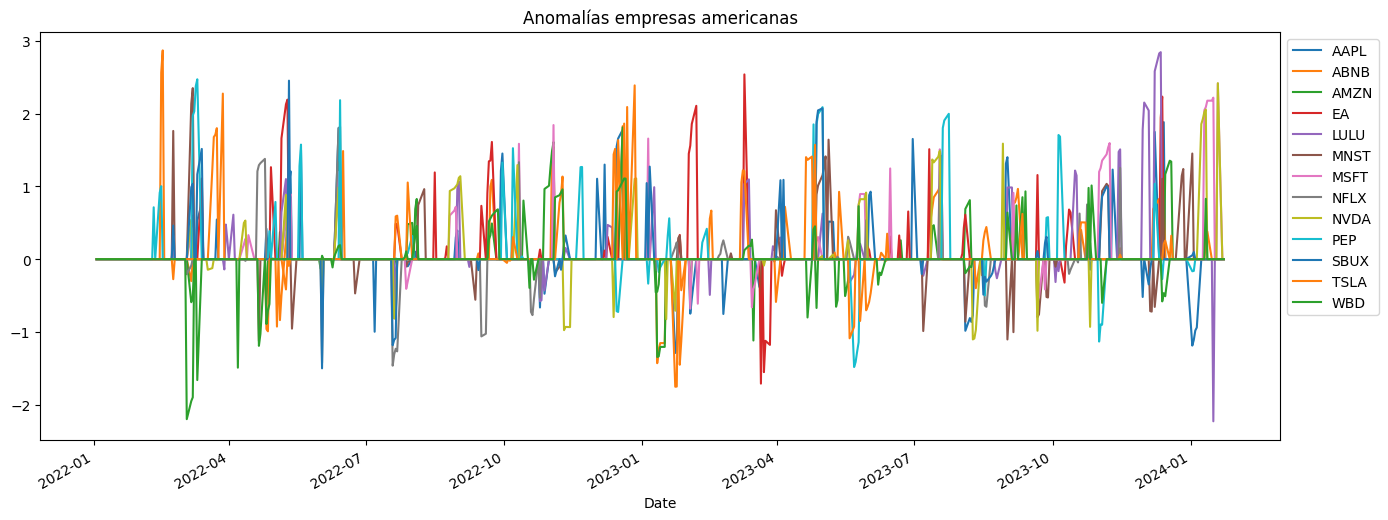

In [ ]:
(df_resultado['señal'][empresas_americanas]*df_resultado_close_norm[empresas_americanas]).plot()
plt.title("Anomalías empresas americanas")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

A primera vista parece que hay un indicio de que las anomalías puede coincidir. Pero aún observamos que cuando hay anomalías en las acciones de varias empresas tambien las hay de forma inversa en otras.

Vamos a extender la segmentación a Tecnologia, Sector bancario, consumo, energía, industria y otros

In [ ]:
sectores = {
    'Tecnología': ['AAPL', 'AMZN', 'EA', 'MSFT', 'NFLX', 'NVDA', 'TSLA'],
    'Financiero': ['BBVA.MC', 'IDR.MC', 'IBE.MC', 'ITX.MC', 'REP.MC', 'TEF.MC'],
    'Alimentación': ['LULU', 'SBUX', 'PEP'],
    'Salud': ['MNST'],
    'Energía': ['ELE.MC', 'NTGY.MC'],
    'Industrial': ['ABNB', 'AENA.MC'],
    'Otro': ['WBD']
}

In [ ]:
def plot_anomalies(df_resultado, df_resultado_close_norm, empresas, title):
    anomalies = df_resultado['señal'][empresas] * df_resultado_close_norm.loc[:, empresas]
    anomalies.plot()
    plt.title(title)
    plt.show()

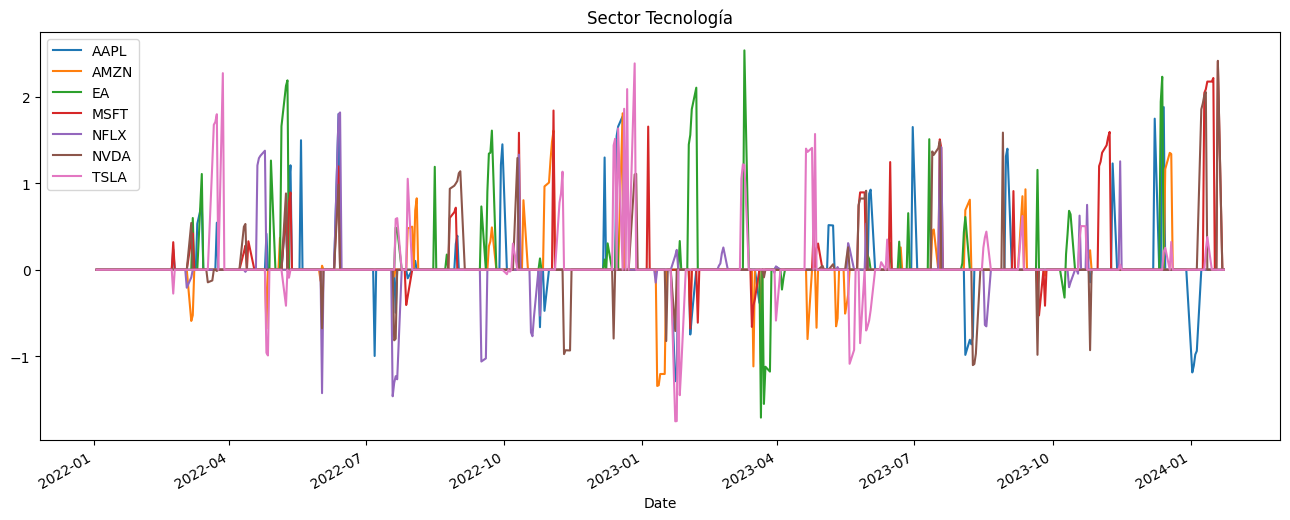

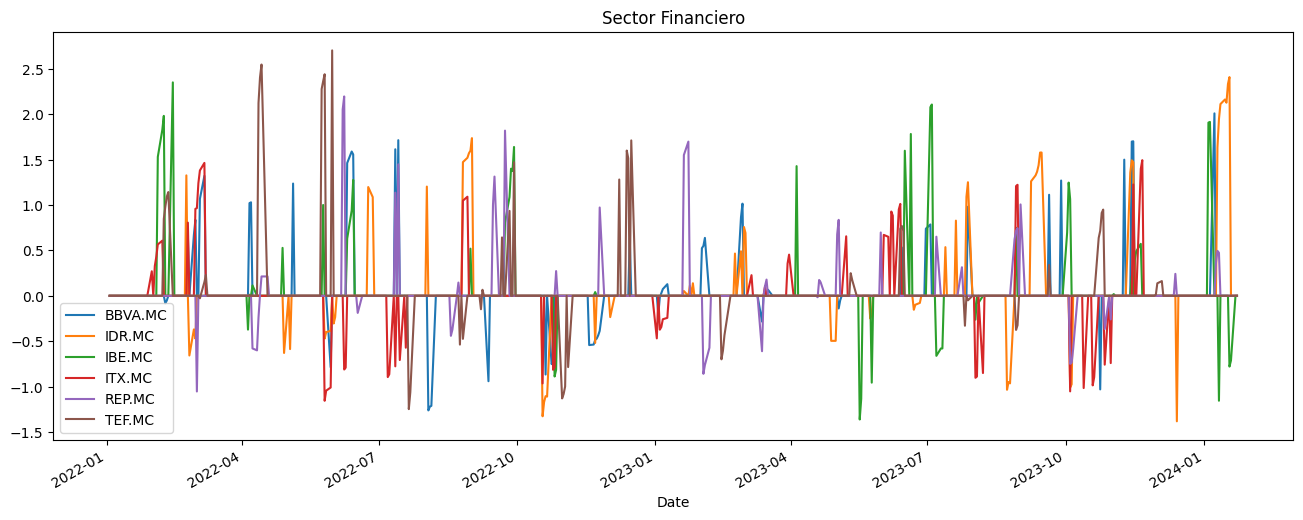

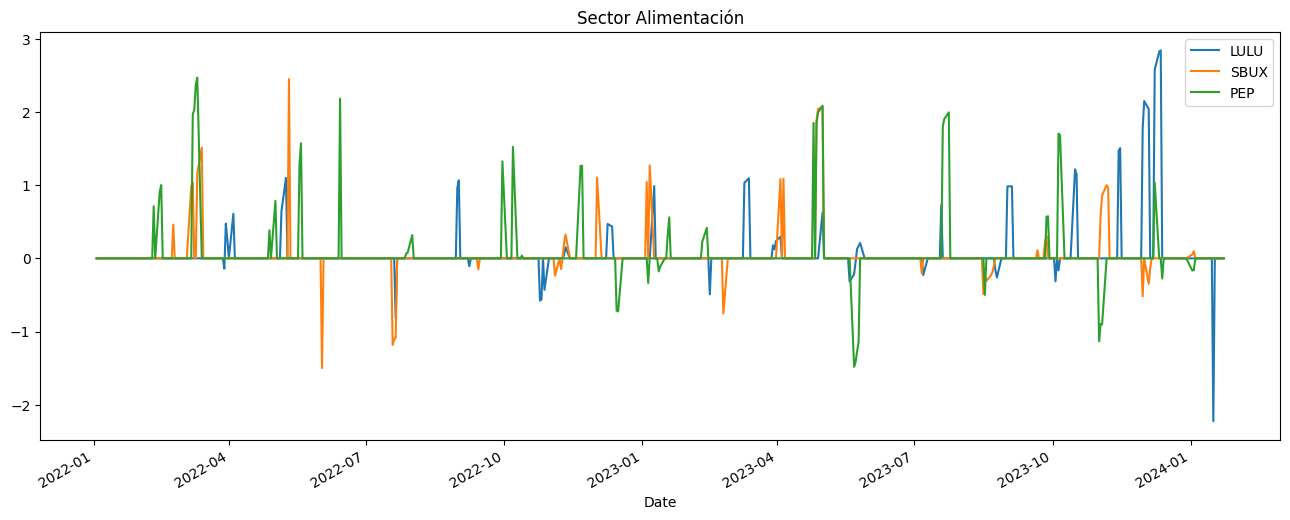

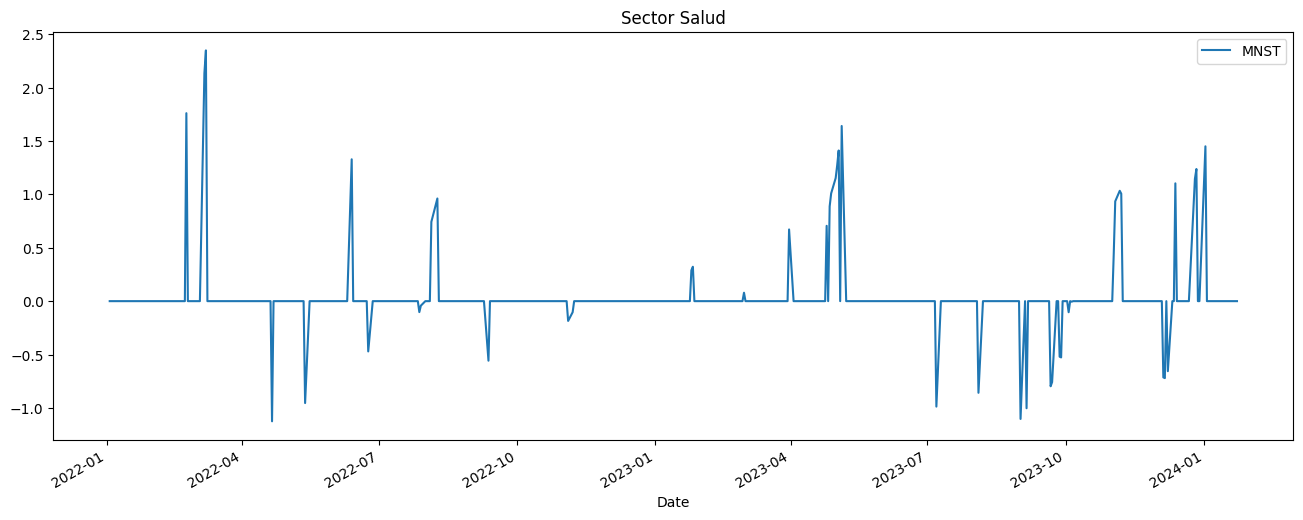

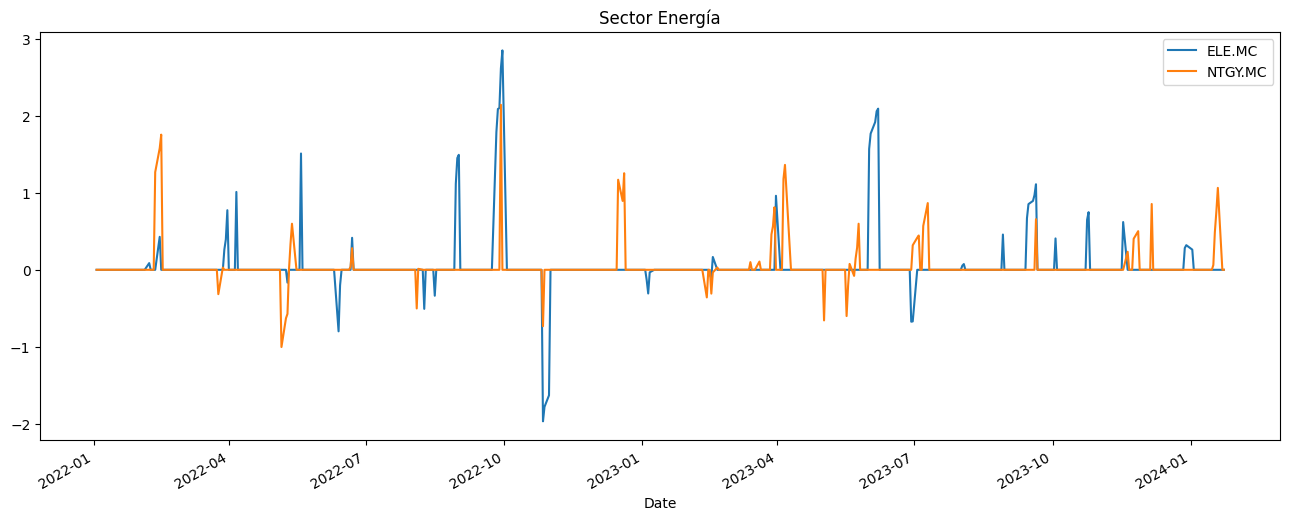

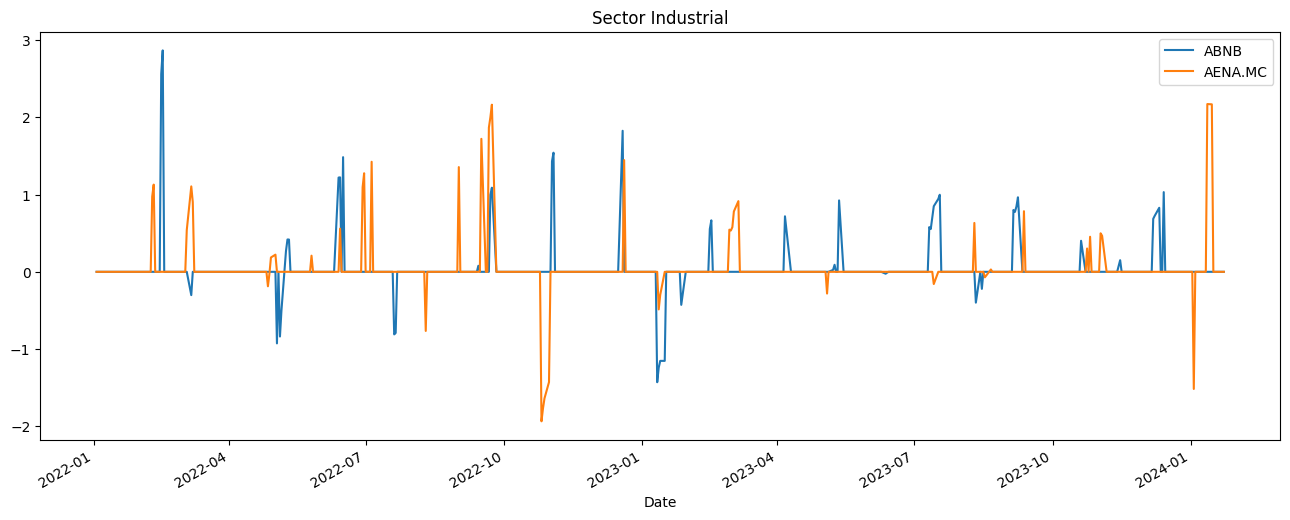

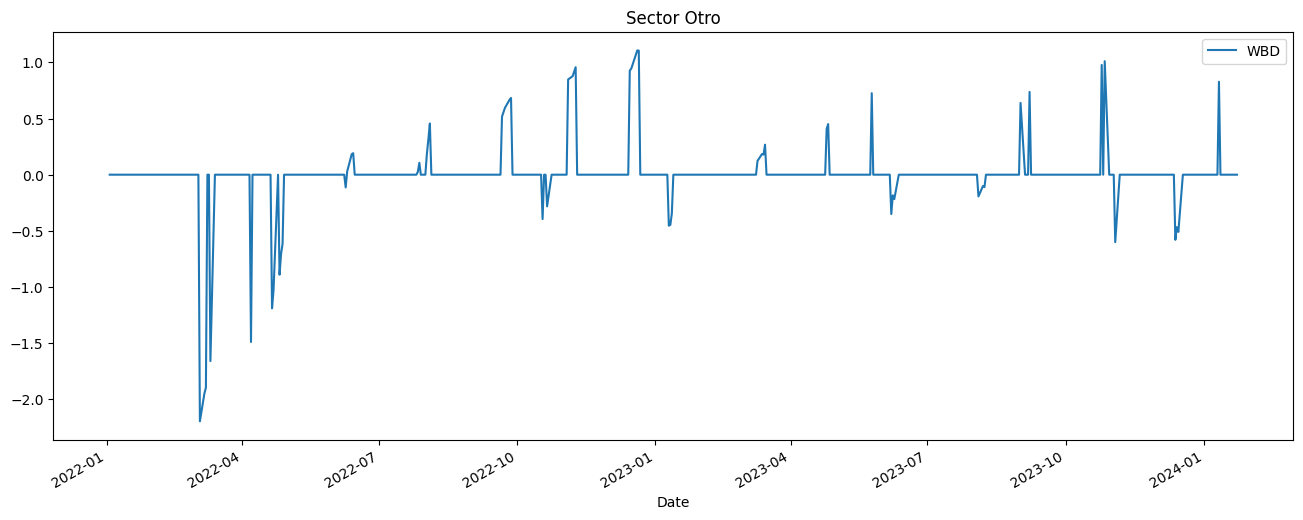

In [ ]:
for key, lista_empresas in sectores.items():
    plot_anomalies(df_resultado, df_resultado_close_norm, lista_empresas, title=f"Sector {key}")

We can observe that anomalies in different sectors are similar. Additionally, we've been lucky with the dataset, as it was already separated by sectors and by American and Spanish companies. For example, we only have Spanish banks and American tech companies. Perhaps the food sector is not the best, which is why the anomalies don't align as much, but even so, some similarities can still be found.



In [ ]:
df_resultado.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Dia_Laboral',
       'festivos_Nasdaq', 'festivos_IBEX', 'media', 'banda_superior',
       'banda_inferior', 'señal'],
      dtype='object')

In [ ]:
df_close_strategy =df_resultado[['Close','señal', 'Dia_Laboral', 'festivos_Nasdaq', 'festivos_IBEX']]
df_close_strategy

Close                                              \
                  AAPL        ABNB     AENA.MC        AMZN BBVA.MC   
Date                                                                 
2022-01-03  182.009995  172.679993  142.199997  170.404495   5.260   
2022-01-04  179.699997  170.800003  144.449997  167.522003   5.393   
2022-01-05  174.919998  162.250000  145.699997  164.356995   5.380   
2022-01-06  172.000000  159.750000  146.000000  163.253998   5.458   
2022-01-07  172.169998  166.050003  144.399994  162.554001   5.587   
...                ...         ...         ...         ...     ...   
2024-01-17  182.679993  134.979996  161.750000  151.710007   8.094   
2024-01-18  188.630005  137.039993  163.600006  153.500000   8.084   
2024-01-19  191.559998  139.929993  163.350006  155.339996   7.996   
2024-01-22  193.889999  142.009995  165.149994  154.779999   8.172   
2024-01-23  193.889999  142.009995  161.500000  154.779999   8.118   

                                                              ... señal       \
                    EA     ELE.MC  IBE.MC  IDR.MC     ITX.MC  ...  NVDA  PEP   
Date                                                          ...              
2022-01-03  134.949997  20.180000  10.445   9.645  28.660000  ...   0.0  0.0   
2022-01-04  135.759995  20.240000  10.385   9.540  28.510000  ...   0.0  0.0   
2022-01-05  133.800003  19.790001  10.315   9.620  28.459999  ...   0.0  0.0   
2022-01-06  129.690002  19.535000  10.250   9.530  28.270000  ...   0.0  0.0   
2022-01-07  131.779999  19.389999  10.255   9.445  27.660000  ...   0.0  0.0   
...                ...        ...     ...     ...        ...  ...   ...  ...   
2024-01-17  136.619995  19.379999  11.450  15.650  38.419998  ...   0.0  0.0   
2024-01-18  138.029999  19.045000  11.265  15.800  38.630001  ...   0.0  0.0   
2024-01-19  137.720001  18.655001  11.220  15.670  38.869999  ...   1.0  0.0   
2024-01-22  137.570007  18.760000  11.260  15.910  39.119999  ...   0.0  0.0   
2024-01-23  137.570007  18.645000  11.125  15.770  38.759998  ...   0.0  0.0   

                                        Dia_Laboral festivos_Nasdaq  \
           REP.MC SBUX TEF.MC TSLA  WBD                               
Date                                                                  
2022-01-03    0.0  0.0    0.0  0.0  0.0        True           False   
2022-01-04    0.0  0.0    0.0  0.0  0.0        True           False   
2022-01-05    0.0  0.0    0.0  0.0  0.0        True           False   
2022-01-06    0.0  0.0    0.0  0.0  0.0        True           False   
2022-01-07    0.0  0.0    0.0  0.0  0.0        True           False   
...           ...  ...    ...  ...  ...         ...             ...   
2024-01-17    0.0  0.0    0.0  0.0  0.0        True           False   
2024-01-18    0.0  0.0    0.0  0.0  0.0        True           False   
2024-01-19    0.0  0.0    0.0  0.0  0.0        True           False   
2024-01-22    0.0  0.0    0.0  0.0  0.0        True           False   
2024-01-23    0.0  0.0    0.0  0.0  0.0        True           False   

           festivos_IBEX  
                          
Date                      
2022-01-03         False  
2022-01-04         False  
2022-01-05         False  
2022-01-06         False  
2022-01-07         False  
...                  ...  
2024-01-17         False  
2024-01-18         False  
2024-01-19         False  
2024-01-22         False  
2024-01-23         False  

[532 rows x 49 columns]

The strategy will aim to see if we gain within 3 or 5 days from the long or short position. If there's a gain on either of those two days, the position will be closed. If losses exceed 15% of the invested value, the position will be closed. Another possible strategy would be to buy again and hold.

I've added a premium per trade, and we'll ensure that losses don't exceed 15% of the invested amount (stock price).

If this happens, the position will be closed immediately, and the result will be -10.

If there are losses but they don't exceed the stop-loss, the result will be -1, and it will be maintained until the stop-loss is reached or a gain is made. If neither occurs after 30 days, the position will be closed manually, and the result will be -2.

If gains are made, the result will be 1.

I don't think a result of 0 will be obtained, but I'll leave it just in case there's an error.

Also, once a position is taken, you cannot buy or sell the same stock again because it's normal that if there is an anomaly on a certain date, that anomaly might persist for up to the next 5 days, which is when the position will be closed and reopened if necessary.

We'll assume a premium for initiating the trade, which already includes the cost of closing the position.


In [ ]:
df_strategy_final = pd.DataFrame()
capital = 10000
buy_limit = 750
max_iter = 30

df_close_strategy['prima'] = df_close_strategy['Close'] * 0.0015
df_close_strategy['stop_loss'] = df_close_strategy['Close'] * 0.15

compra_mask = df_close_strategy['señal'] == -1
venta_mask = df_close_strategy['señal'] == 1

df_close_strategy['num_acciones'] = np.minimum(buy_limit / df_close_strategy['Close'], capital / df_close_strategy['Close']).astype(int)

# Compras
compra_df = df_close_strategy[compra_mask].copy()
compra_df['precio_total'] = compra_df['num_acciones'] * compra_df['Close']
compra_df['capital_post_compra'] = capital - compra_df['precio_total']

# Ventas
venta_df = df_close_strategy[venta_mask].copy()
venta_df['precio_total'] = venta_df['num_acciones'] * venta_df['Close']
venta_df['capital_post_venta'] = capital + venta_df['precio_total']

for iter_day in range(1, max_iter+1):
    day_delta = pd.Timedelta(days=iter_day)

    compra_df[f'precio_dia_{iter_day}'] = df_close_strategy['Close'].shift(-iter_day) - compra_df['prima']
    venta_df[f'precio_dia_{iter_day}'] = df_close_strategy['Close'].shift(-iter_day) + venta_df['prima']

    compra_df[f'deshacer_compra_{iter_day}'] = (compra_df[f'precio_dia_{iter_day}'] - (compra_df['Close'] / 500)) >= (compra_df['Close'] / 500) * 0.1
    venta_df[f'deshacer_venta_{iter_day}'] = ((compra_df['Close'] / 500) - venta_df[f'precio_dia_{iter_day}']) >= (compra_df['Close'] / 500) * 0.1

    compra_df[f'cerrar_por_stop_{iter_day}'] = ((compra_df['Close'] / 500) - compra_df[f'precio_dia_{iter_day}']) >= compra_df['stop_loss']
    venta_df[f'cerrar_por_stop_{iter_day}'] = (venta_df[f'precio_dia_{iter_day}'] - (compra_df['Close'] / 500)) >= venta_df['stop_loss']

compra_df['iter_final'] = np.where(compra_df[[f'deshacer_compra_{i}' for i in range(1, max_iter+1)]].any(axis=1),
                                   compra_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].idxmax(axis=1), max_iter)

venta_df['iter_final'] = np.where(venta_df[[f'deshacer_venta_{i}' for i in range(1, max_iter+1)]].any(axis=1),
                                  venta_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].idxmax(axis=1), max_iter)

compra_df['P&L'] = compra_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].max(axis=1) * compra_df['num_acciones'] - compra_df['precio_total']
venta_df['P&L'] = venta_df['precio_total'] - venta_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].min(axis=1) * venta_df['num_acciones']


compra_df['capital_final'] = compra_df['capital_post_compra'] + compra_df['P&L']
venta_df['capital_final'] = venta_df['capital_post_venta'] + venta_df['P&L']


df_strategy_final = pd.concat([compra_df, venta_df], axis=0)
df_strategy_final['Resultado'] = np.where(df_strategy_final['P&L'] > 0, 1, -10)
df_strategy_final['Estado'] = 'Cerrada'

df_strategy_final['Capital'] = df_strategy_final['capital_final']



In [ ]:
df_strategy_final['P&L'].sum()

-111.0535842938425

<Axes: >

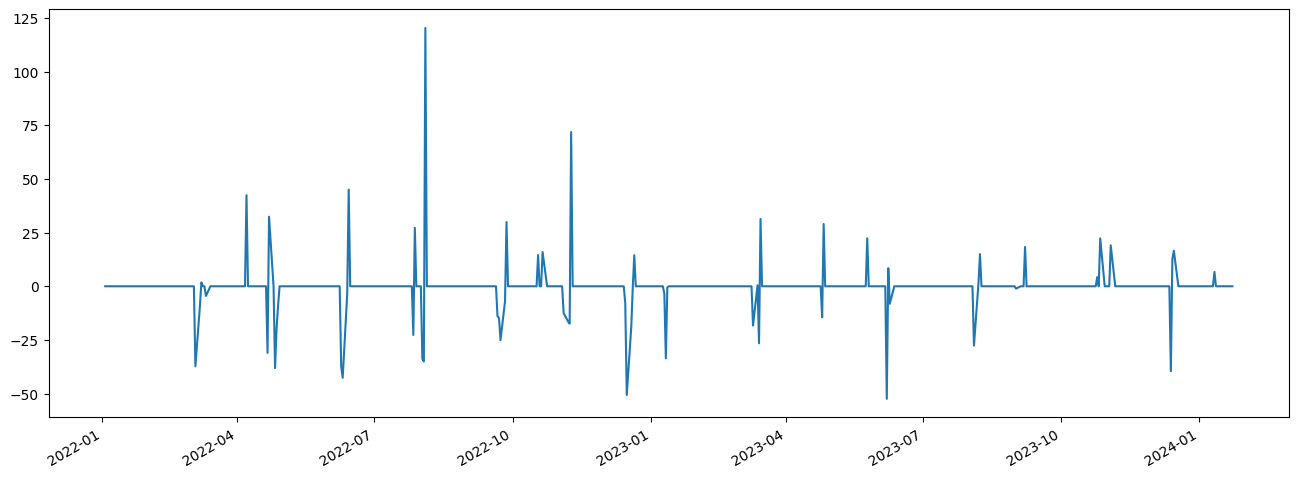

In [ ]:
df_strategy_final['P&L'].plot()

<Axes: >

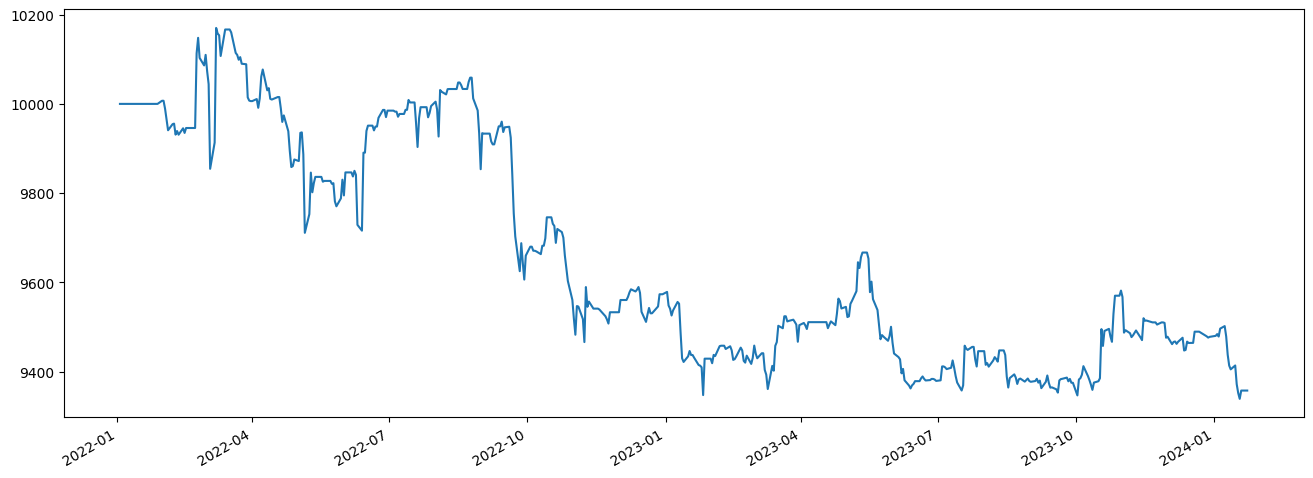

In [ ]:
df_strategy_final['Capital'].plot()

With comissions it seems we end up losing

## Using isolation forest and SVM

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
df_close=df_close_strategy['Close']

In [ ]:
for empresa in df_close.columns:
    datos_empresa = df_close[empresa].values.reshape(-1, 1)

    isolation_forest = IsolationForest(contamination=0.1)
    isolation_forest.fit(datos_empresa)

    anomalias_empresa = isolation_forest.predict(datos_empresa)

    df_close[f'Anomalies_{empresa}'] = anomalias_empresa

In [ ]:
def plot_anomalies_iso(df_close, df_resultado_close_norm, empresas, title="With Iso"):
    for empresa in empresas:
        df_close_copy = df_close.copy()
        df_close_copy[f'Anomalies_{empresa}'].replace(1, 0, inplace=True)
        anomalies = df_close_copy[f'Anomalies_{empresa}'] * df_resultado_close_norm[empresa]
        anomalies.plot(label=f'Anomalies_{empresa}')
        plt.title(f'Anomalies {title}')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

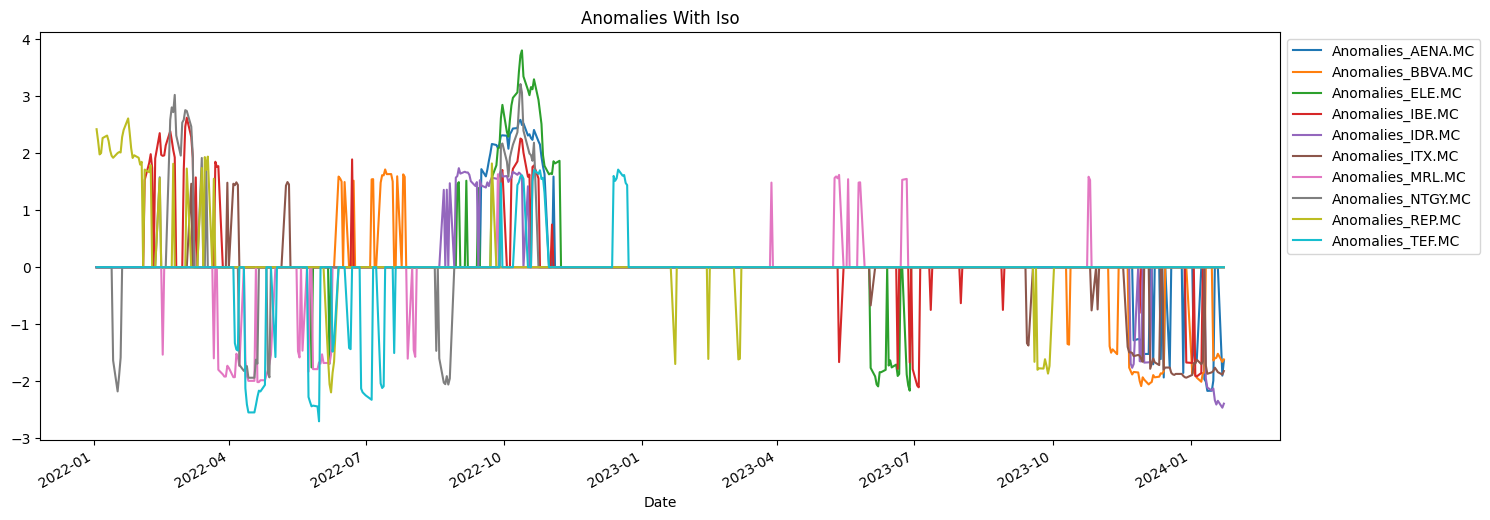

In [ ]:
plot_anomalies_iso(df_close, df_resultado_close_norm, empresas_españolas)

In [ ]:
def plot_anomaly(df_resultado, df_resultado_close_norm, empresa):
    (df_resultado['señal'][empresa]*df_resultado_close_norm[empresa]).plot()
    plt.title(f"Anomalías de empresa {empresa}")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

def plot_anomaly_iso(df_close, df_resultado_close_norm, empresa):
    df_close_copy = df_close.copy()
    df_close_copy[f'Anomalies_{empresa}'].replace(1, 0, inplace=True)
    anomalies = df_close_copy[f'Anomalies_{empresa}'] * df_resultado_close_norm[empresa]
    anomalies.plot(label=f'Anomalies_{empresa} with iso')
    plt.title(f'Anomalies_{empresa}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

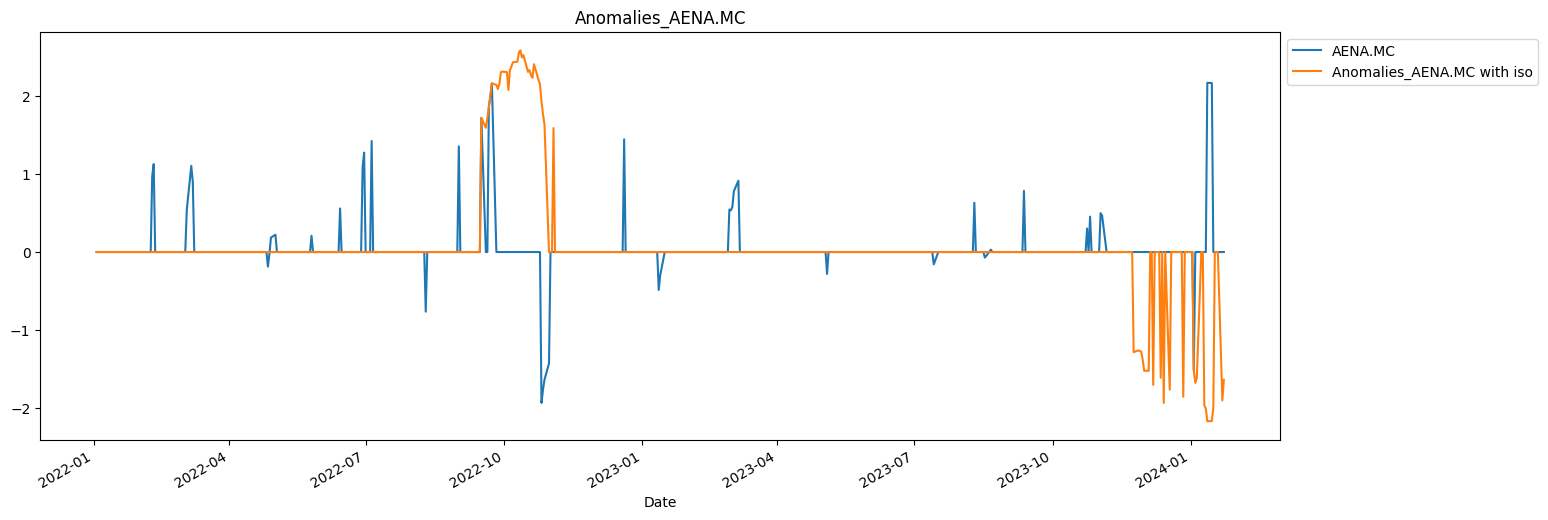

In [ ]:
plot_anomaly(df_resultado, df_resultado_close_norm, "AENA.MC")
plot_anomaly_iso(df_close, df_resultado_close_norm, "AENA.MC")

Isolation Forest no detecta tanta anomalía para ser un primer ejemplo.

Veamos por sectores. la comparación.

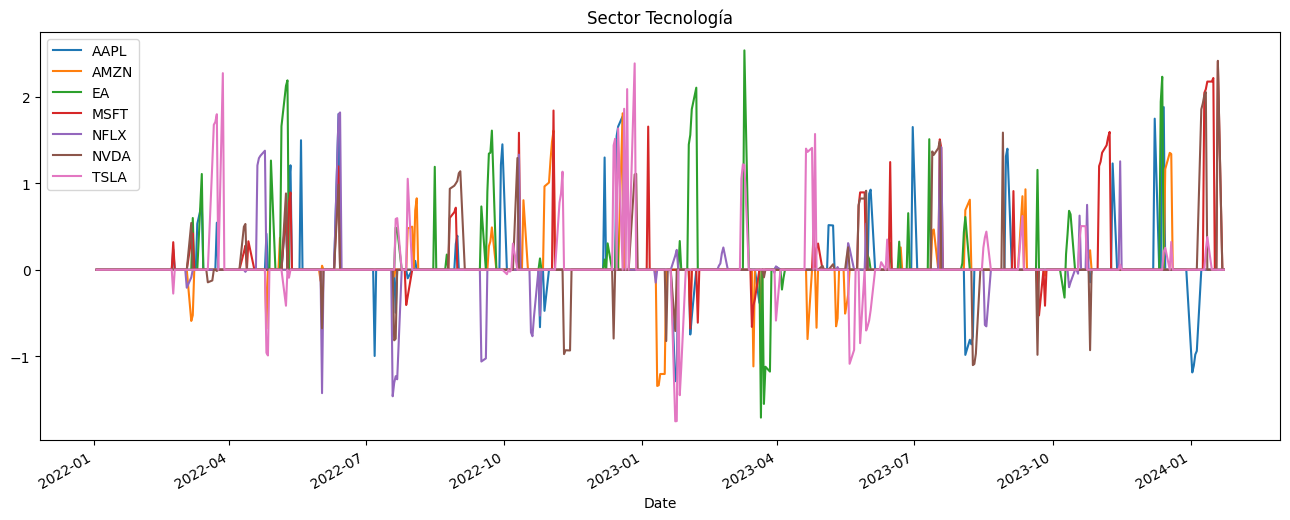

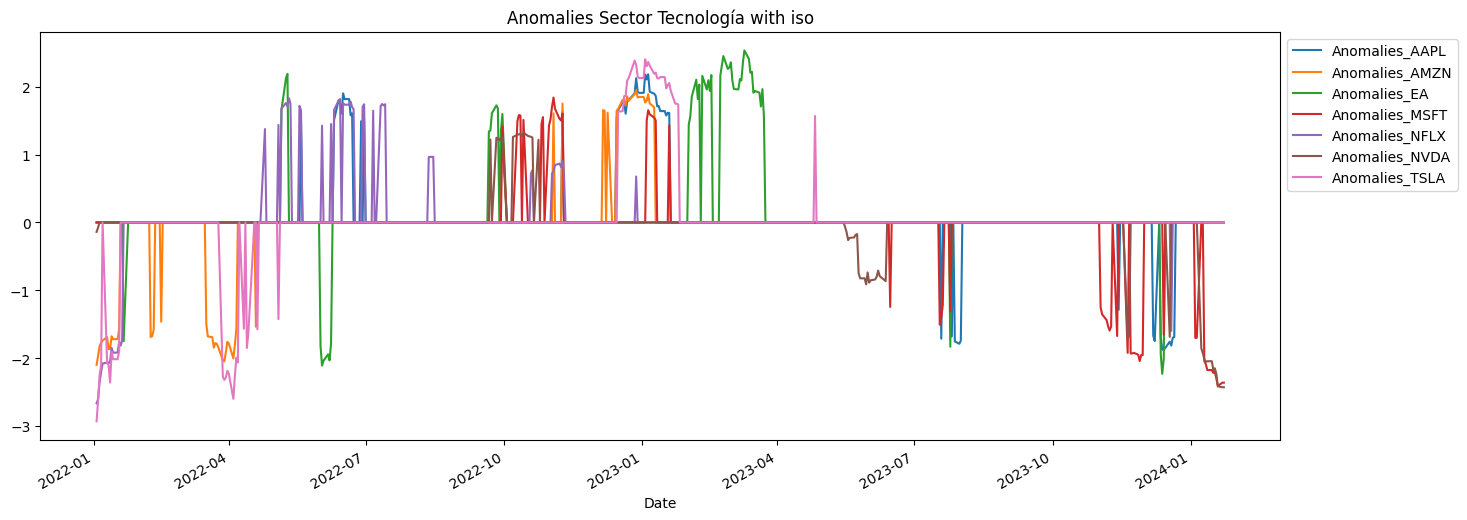

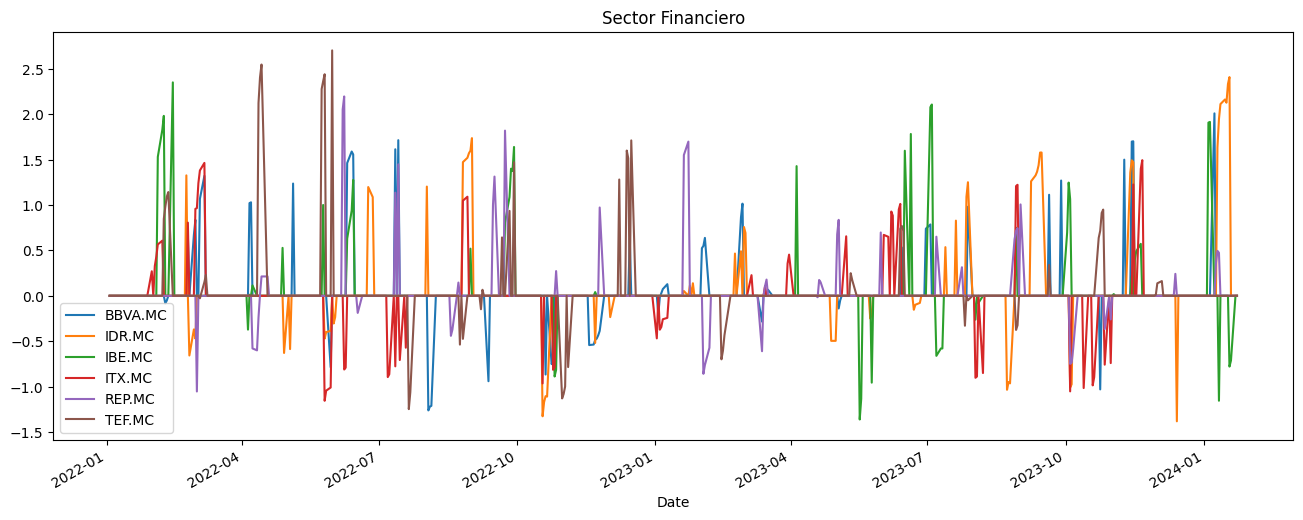

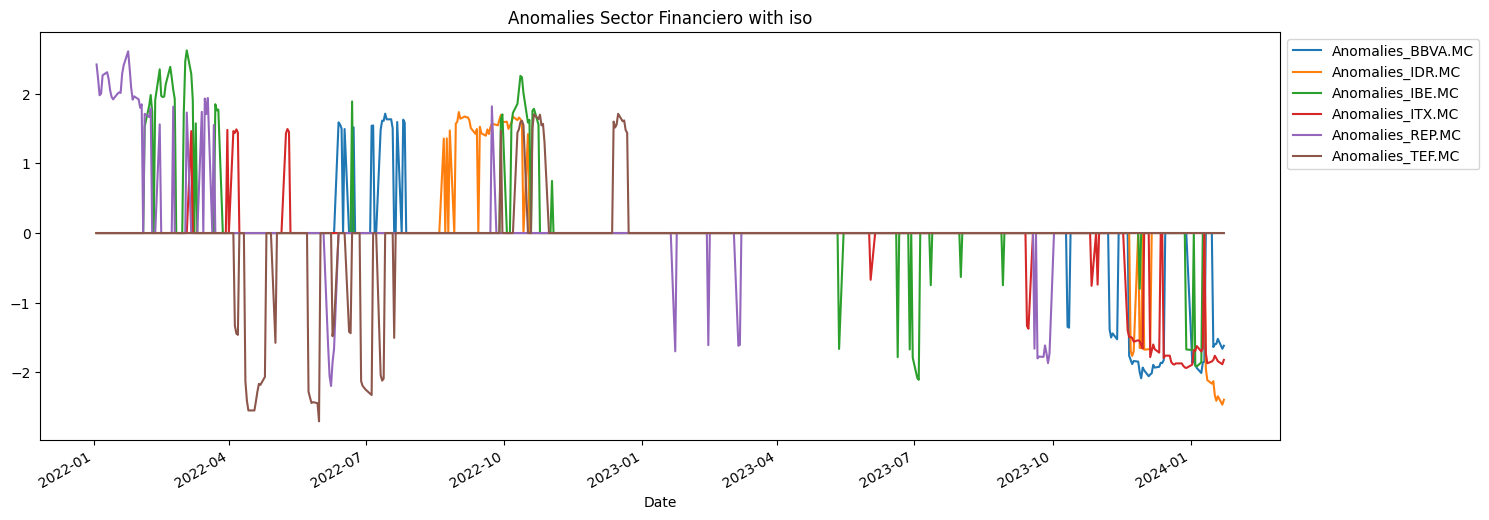

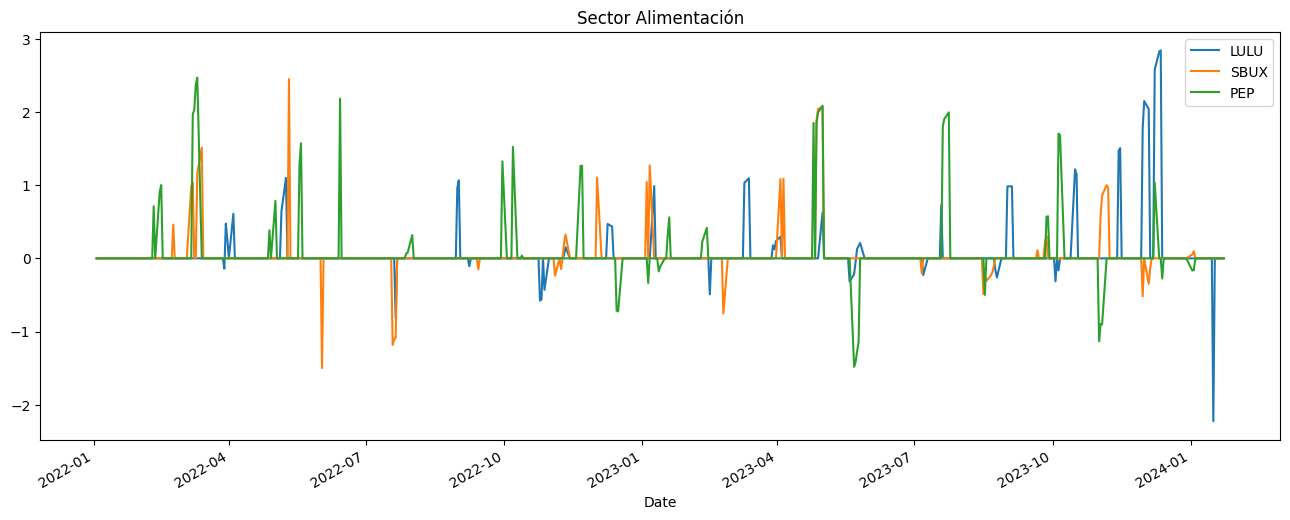

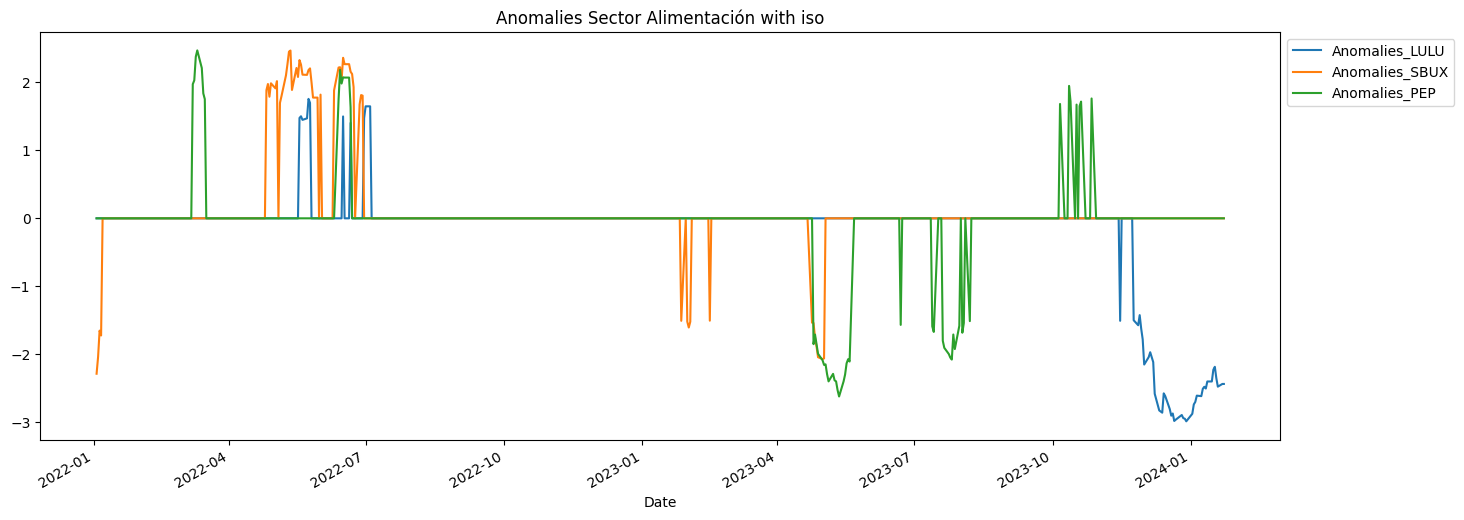

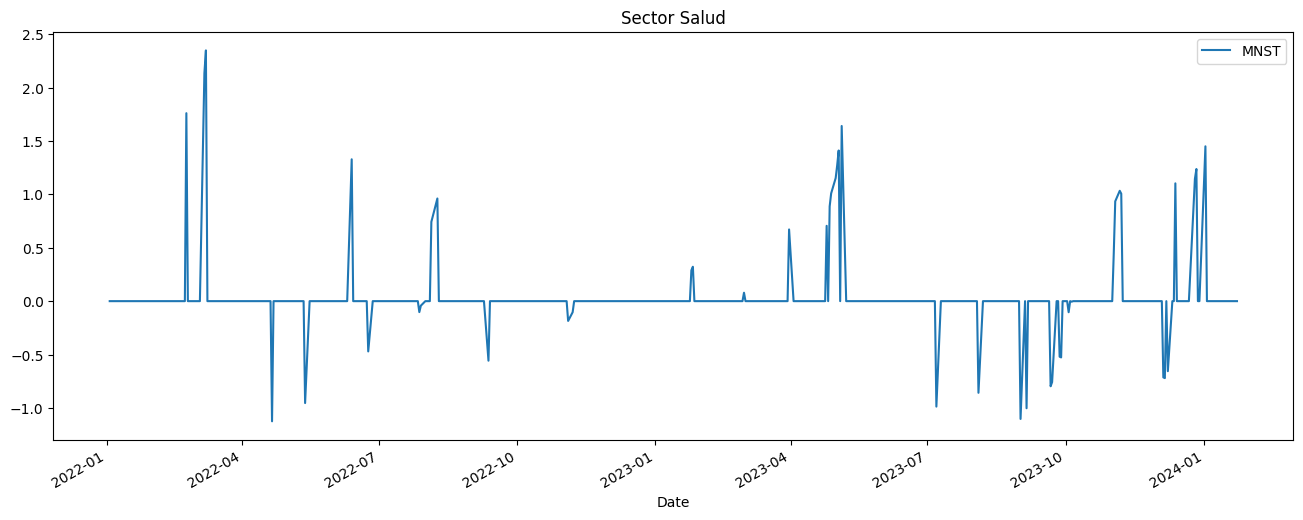

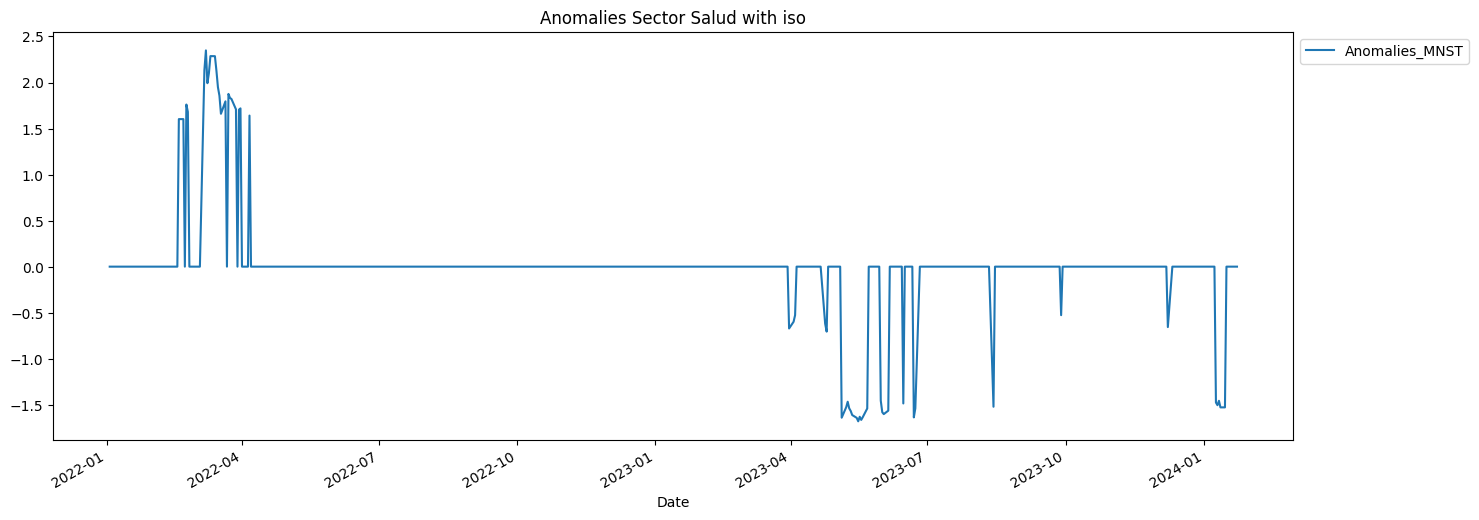

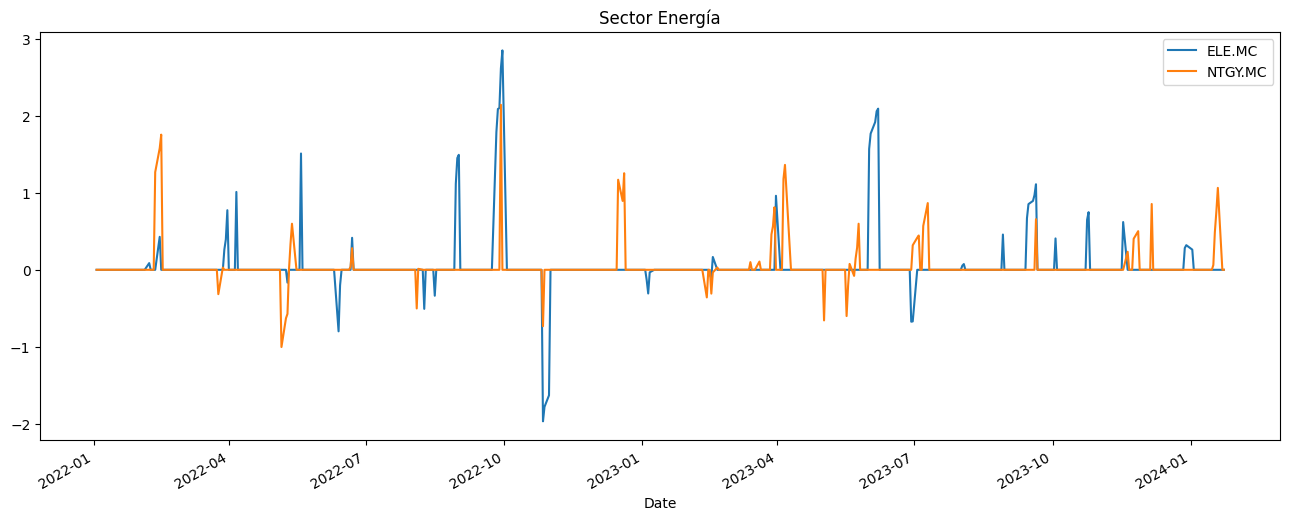

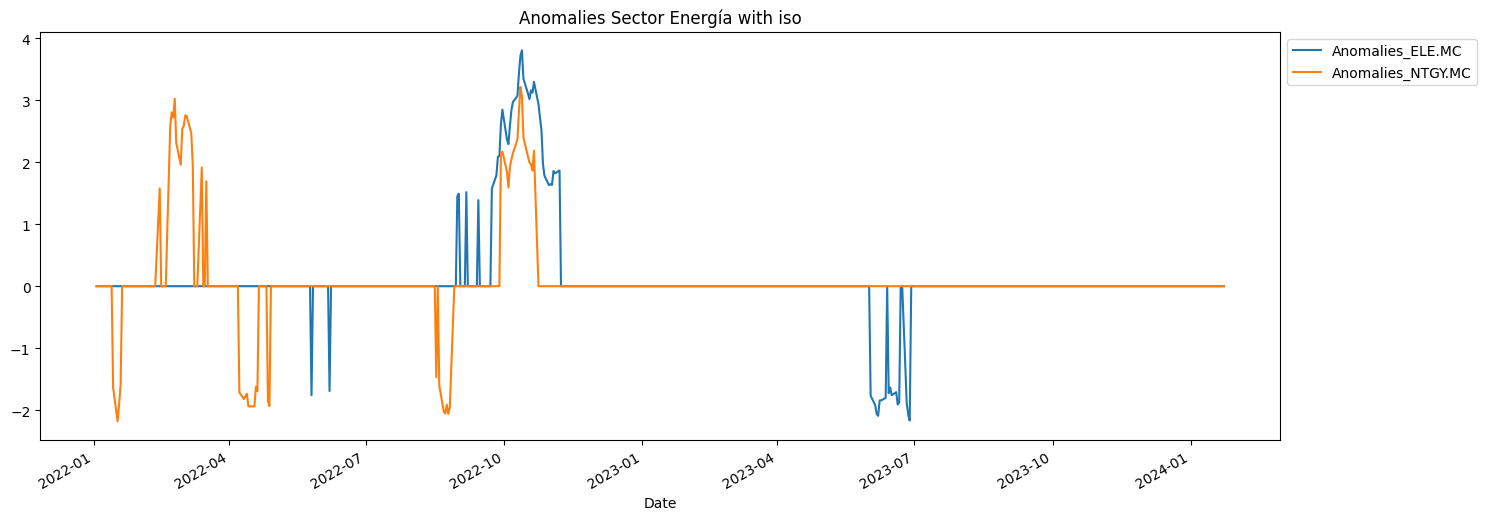

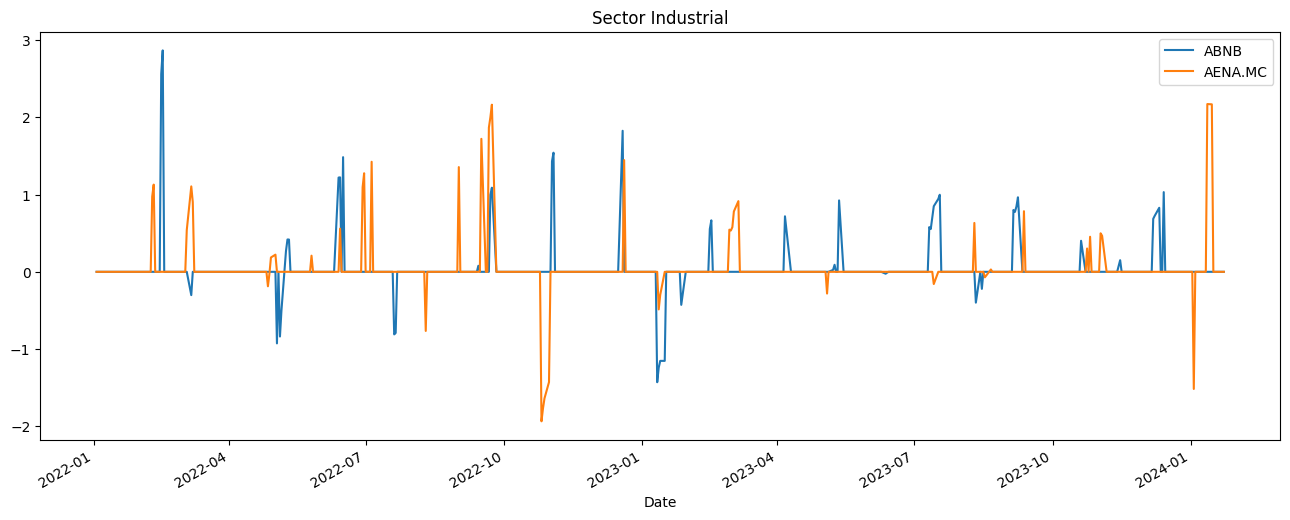

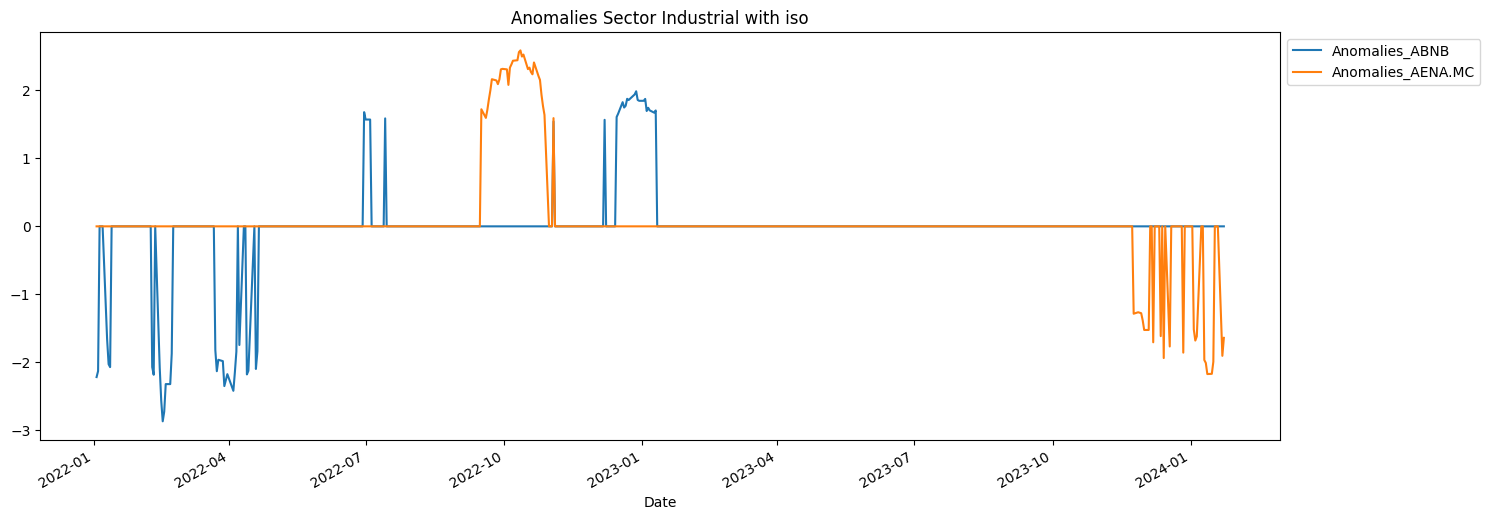

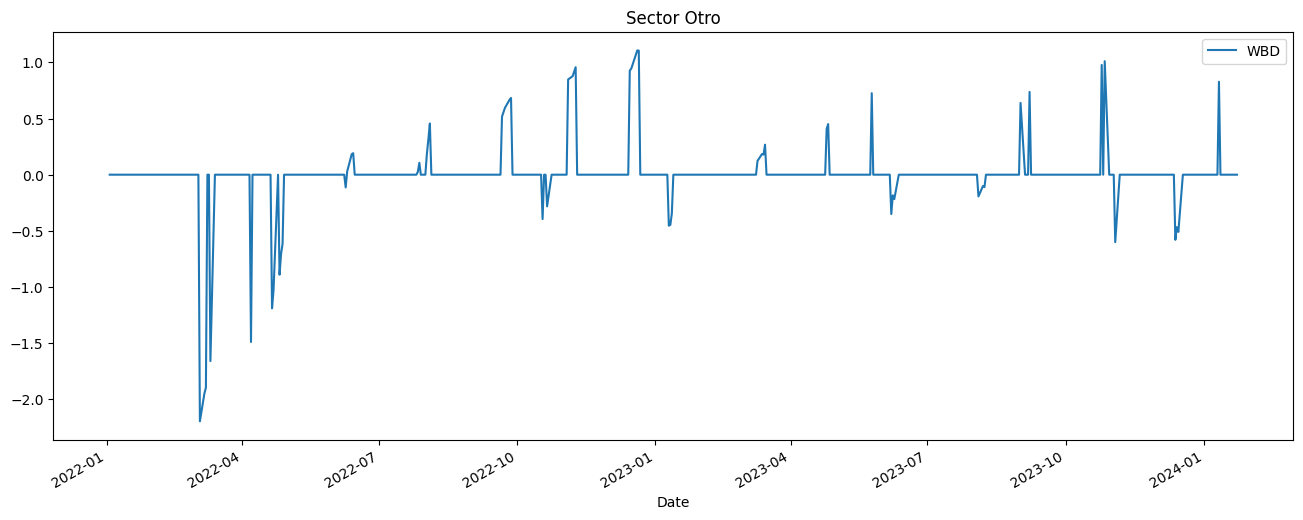

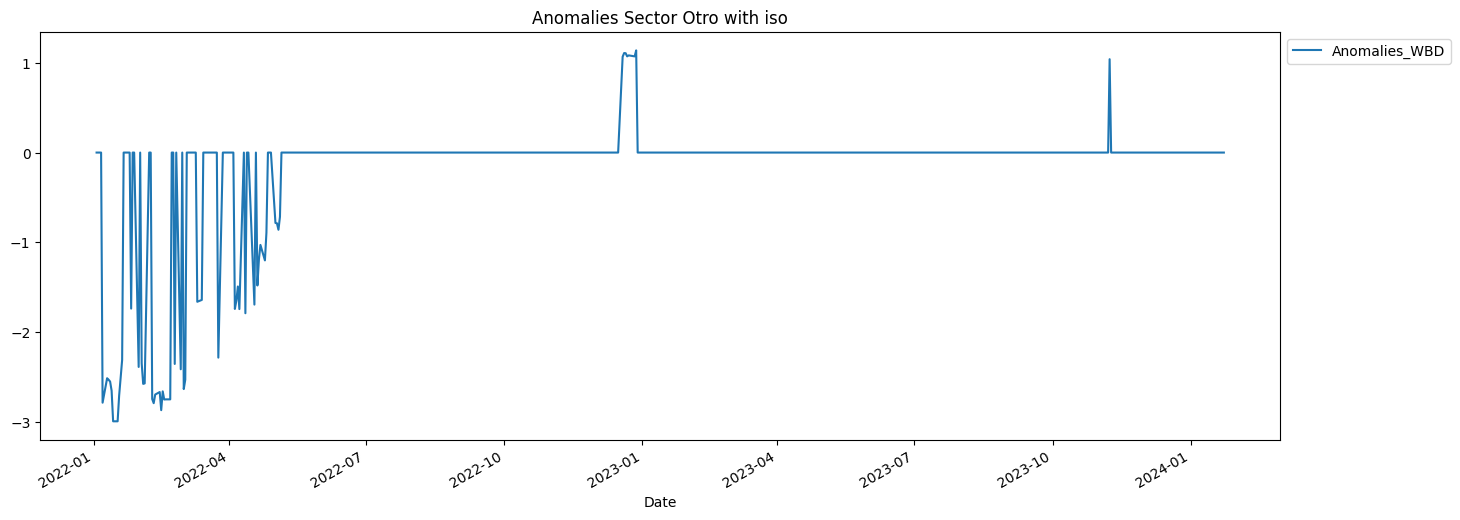

In [ ]:
for key, lista_empresas in sectores.items():
    plot_anomalies(df_resultado, df_resultado_close_norm, lista_empresas, title=f"Sector {key}")
    plt.show()
    plot_anomalies_iso(df_close, df_resultado_close_norm, lista_empresas, title=f"Sector {key} with iso")

In [ ]:
for empresa in empresas:
    df_close[f'Anomalies_{empresa}'].replace(1, 0, inplace=True)

In [ ]:
df_close

,AAPL,ABNB,AENA.MC,AMZN,BBVA.MC,EA,ELE.MC,IBE.MC,IDR.MC,ITX.MC,...,Anomalies_MSFT,Anomalies_NFLX,Anomalies_NTGY.MC,Anomalies_NVDA,Anomalies_PEP,Anomalies_REP.MC,Anomalies_SBUX,Anomalies_TEF.MC,Anomalies_TSLA,Anomalies_WBD
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.009995,172.679993,142.199997,170.404495,5.260,134.949997,20.180000,10.445,9.645,28.660000,...,0,-1,0,-1,0,-1,-1,0,-1,0
2022-01-04,179.699997,170.800003,144.449997,167.522003,5.393,135.759995,20.240000,10.385,9.540,28.510000,...,0,-1,0,-1,0,-1,-1,0,-1,0
2022-01-05,174.919998,162.250000,145.699997,164.356995,5.380,133.800003,19.790001,10.315,9.620,28.459999,...,0,-1,0,0,0,-1,-1,0,-1,0
2022-01-06,172.000000,159.750000,146.000000,163.253998,5.458,129.690002,19.535000,10.250,9.530,28.270000,...,0,-1,0,0,0,-1,-1,0,-1,0
2022-01-07,172.169998,166.050003,144.399994,162.554001,5.587,131.779999,19.389999,10.255,9.445,27.660000,...,0,-1,0,0,0,-1,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-17,182.679993,134.979996,161.750000,151.710007,8.094,136.619995,19.379999,11.450,15.650,38.419998,...,-1,0,0,-1,0,0,0,0,0,0
2024-01-18,188.630005,137.039993,163.600006,153.500000,8.084,138.029999,19.045000,11.265,15.800,38.630001,...,-1,0,0,-1,0,0,0,0,0,0
2024-01-19,191.559998,139.929993,163.350006,155.339996,7.996,137.720001,18.655001,11.220,15.670,38.869999,...,-1,0,0,-1,0,0,0,0,0,0


The problem with the isolation forest is that we do not know if we should buy or sell, so we are going to compare the price in that row when we find a -1 and compare it with the average. If it is below it we will have to buy and if it is above it we will have to sell.

In [ ]:
for empresa in empresas:
    anomalies_column = f'Anomalies_{empresa}'
    price_column = empresa
    df_close.loc[(df_close[anomalies_column] == -1) & (df_close[price_column] < df_close[price_column].mean()), anomalies_column] = -1
    df_close.loc[(df_close[anomalies_column] == -1) & (df_close[price_column] > df_close[price_column].mean()), anomalies_column] = 1

In [ ]:
def generate_strategy_vectorized(df_close, empresas=empresas):
    df_strategy_final = pd.DataFrame(index=df_close.index)
    capital = 10000
    buy_limit = 750
    max_iter = 30

    df_close['stop_loss'] = df_close[empresas] * 0.15
    df_close['prima'] = df_close[empresas] * 0.0015

    df_close['num_acciones'] = np.minimum(buy_limit / df_close[empresas], capital / df_close[empresas]).astype(int)

    compra_mask = df_close[[f'Anomalies_{empresa}' for empresa in empresas]] == -1
    venta_mask = df_close[[f'Anomalies_{empresa}' for empresa in empresas]] == 1

    compra_df = df_close[compra_mask].copy()
    venta_df = df_close[venta_mask].copy()

    compra_df['precio_total'] = compra_df['num_acciones'] * compra_df[empresas]
    compra_df['capital_post_compra'] = capital - compra_df['precio_total']

    venta_df['precio_total'] = venta_df['num_acciones'] * venta_df[empresas]
    venta_df['capital_post_venta'] = capital + venta_df['precio_total']

    for iter_day in range(1, max_iter+1):
        day_delta = pd.Timedelta(days=iter_day)

        compra_df[f'precio_dia_{iter_day}'] = df_close[empresas].shift(-iter_day) - compra_df['prima']
        venta_df[f'precio_dia_{iter_day}'] = df_close[empresas].shift(-iter_day) + venta_df['prima']

        compra_df[f'deshacer_compra_{iter_day}'] = (compra_df[f'precio_dia_{iter_day}'] - (compra_df[empresas] / 500)) >= (compra_df[empresas] / 500) * 0.1
        venta_df[f'deshacer_venta_{iter_day}'] = ((compra_df[empresas] / 500) - venta_df[f'precio_dia_{iter_day}']) >= (compra_df[empresas] / 500) * 0.1

        compra_df[f'cerrar_por_stop_{iter_day}'] = ((compra_df[empresas] / 500) - compra_df[f'precio_dia_{iter_day}']) >= compra_df['stop_loss']
        venta_df[f'cerrar_por_stop_{iter_day}'] = (venta_df[f'precio_dia_{iter_day}'] - (compra_df[empresas] / 500)) >= venta_df['stop_loss']

    compra_df['iter_final'] = np.where(compra_df[[f'deshacer_compra_{i}' for i in range(1, max_iter+1)]].any(axis=1),
                                       compra_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].idxmax(axis=1), max_iter)

    venta_df['iter_final'] = np.where(venta_df[[f'deshacer_venta_{i}' for i in range(1, max_iter+1)]].any(axis=1),
                                      venta_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].idxmax(axis=1), max_iter)

    compra_df['P&L'] = compra_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].max(axis=1) * compra_df['num_acciones'] - compra_df['precio_total']
    venta_df['P&L'] = venta_df['precio_total'] - venta_df[[f'precio_dia_{i}' for i in range(1, max_iter+1)]].min(axis=1) * venta_df['num_acciones']

    compra_df['capital_final'] = compra_df['capital_post_compra'] + compra_df['P&L']
    venta_df['capital_final'] = venta_df['capital_post_venta'] + venta_df['P&L']

    df_strategy_final = pd.concat([compra_df, venta_df], axis=0)
    df_strategy_final['Resultado'] = np.where(df_strategy_final['P&L'] > 0, 1, -10)
    df_strategy_final['Estado'] = 'Cerrada'

    df_strategy_final['Capital'] = df_strategy_final['capital_final']

    return df_strategy_final

df_strategy_iso = generate_strategy_vectorized(df_close)


<Axes: >

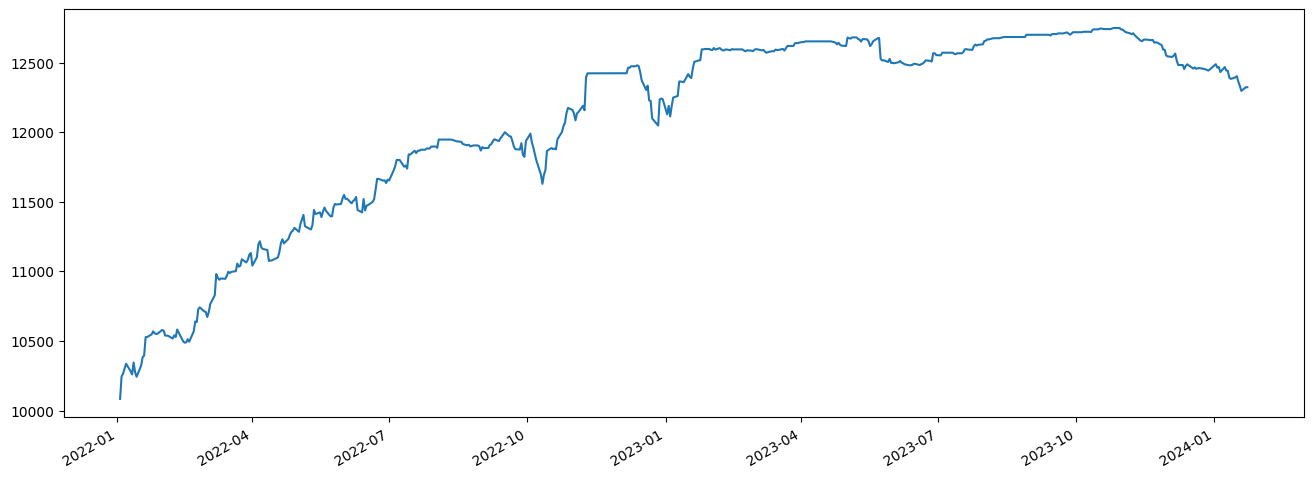

In [ ]:
df_strategy_iso['Capital'].plot()

Now we are going to simulate thousands of portfolios and see the results

In [ ]:
def rand_weights(n):
    ''' Generamos n pesos aleatorios que suman 1 '''
    vec = np.random.random(n)
    #Como la función es aleatoria y la función random puede devolver un valor muy cercano a 0 he querido añadir
    #un peso inicial a cada activo porque de que sirve montar tu cartera con ciertos activos si ni siquiera vas a invertir en
    #alguno de ellos una pequeña cantidad. Hacemos esto porque el modelo de Markowitz se basa en diversificar la cartera
    #para minimizar el riesgo y obtener el máximo beneficio.
    vec +=0.01
    vec = vec/vec.sum()

    return vec
def random_portfolio(returns):
    '''
    Calcula la media y desviación standard de los retornos para un portfolio aleatorio
    '''
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape))
    C = np.asmatrix(np.cov(returns))
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)

    # Esta parte recursiva reduce outliers para mantener los gráficos ajustados
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma, w

def generar_indicadores(returns, w, mu, sigma, returns_market, rf=0.037):
    """
    returns: retornos anuales de las acciones
    w:pesos
    sigma: desviacion estandar
    returns_market: retorno de mercado. Escogemos la media de los retornos de todas las acciones
    rf: interes libre de riesgo a 3 meses que es que daban por una letra del tesoro de España aproximadamente
    """
    returns_market_adjusted = returns_market.values.reshape(-1, 1)

    std = np.std(returns, axis=1)
    maxi = np.max(returns, axis=1)
    mini = np.min(returns, axis=1)
    rango = maxi - mini
    sharpe_ratio = (mu-rf/250) / sigma
    C = np.cov(returns)
    var = np.var(returns, axis=1)
    beta = np.cov(returns, returns_market_adjusted, rowvar=False)[0, 1] / np.var(returns_market_adjusted)

    drawdown = np.maximum.accumulate(np.cumsum(returns, axis=1) - 1, axis=1)
    max_drawdown = np.max(drawdown, axis=1)

    indicators = {
        'Mean': mu,
        'Standard Deviation': std,
        'Max': maxi,
        'Min': mini,
        'Range': rango,
        'Sharpe Ratio': sharpe_ratio,
        'Beta': beta,
        'Drawdown': max_drawdown
    }

    return indicators



In [ ]:
np.random.seed(9)
n_assets = len(empresas)
df_close_empresas = df_close[empresas]

In [ ]:
returns = df_close_empresas.pct_change()
returns = returns.dropna()

In [ ]:
returns.shape

(531, 23)

In [ ]:
return_matrix = returns.T

In [ ]:
return_matrix.shape

(23, 531)

In [ ]:
def random_portfolio(returns):
    '''
    Calcula la media y desviación standard de los retornos para un portfolio aleatorio
    '''
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma, w

In [ ]:
mu, sigma, w=random_portfolio(return_matrix)

In [ ]:
returns_market = return_matrix.mean(axis=1)
returns_market.shape

(23,)

In [ ]:
return_matrix.shape

(23, 531)

In [ ]:
indicadores_returns = generar_indicadores(return_matrix,w, mu, sigma, returns_market)

In [ ]:
indicadores_returns

{'Mean': matrix([[0.00020394]]),
 'Standard Deviation': AAPL       0.017953
 ABNB       0.032034
 AENA.MC    0.015734
 AMZN       0.026098
 BBVA.MC    0.019633
 EA         0.014401
 ELE.MC     0.014552
 IBE.MC     0.012920
 IDR.MC     0.019181
 ITX.MC     0.016025
 LULU       0.025717
 MNST       0.015801
 MRL.MC     0.017443
 MSFT       0.018845
 NFLX       0.034491
 NTGY.MC    0.015036
 NVDA       0.034810
 PEP        0.010672
 REP.MC     0.018627
 SBUX       0.018423
 TEF.MC     0.013693
 TSLA       0.036882
 WBD        0.036065
 dtype: float64,
 'Max': AAPL       0.088975
 ABNB       0.133532
 AENA.MC    0.062896
 AMZN       0.135359
 BBVA.MC    0.086696
 EA         0.079659
 ELE.MC     0.067142
 IBE.MC     0.052163
 IDR.MC     0.120525
 ITX.MC     0.067924
 LULU       0.127158
 MNST       0.075200
 MRL.MC     0.062262
 MSFT       0.082268
 NFLX       0.160548
 NTGY.MC    0.048919
 NVDA       0.243696
 PEP        0.041823
 REP.MC     0.068258
 SBUX       0.098345
 TEF.MC     0.0356

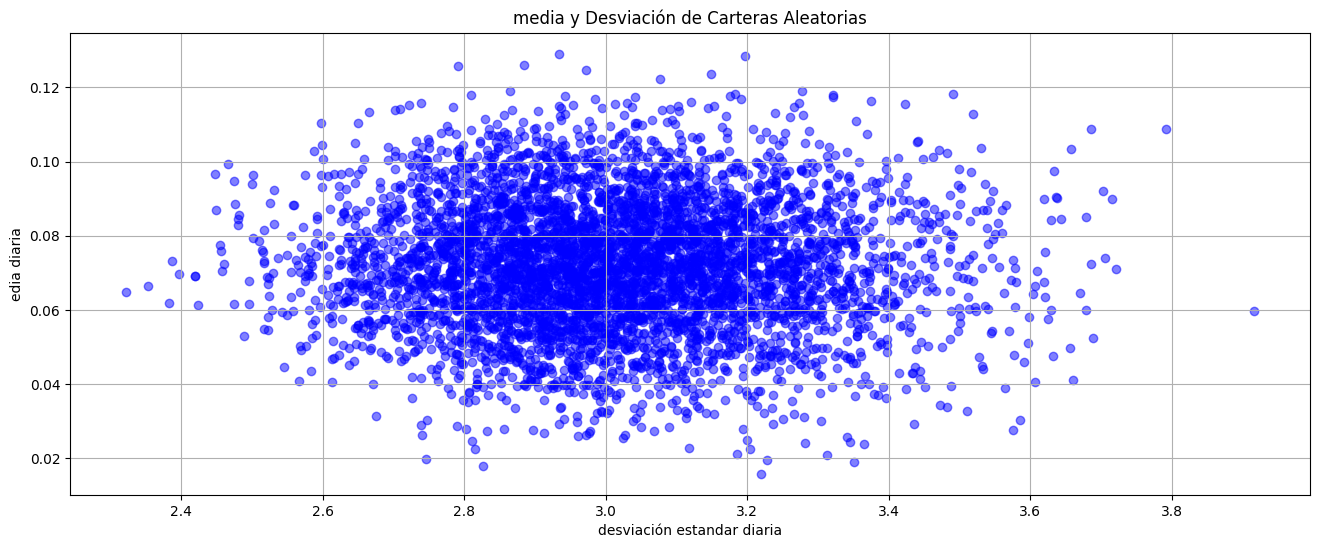

In [ ]:
num_portfolios = 5000
results = [random_portfolio(return_matrix) for _ in range(num_portfolios)]

mus, sigmas, ws = zip(*results)

mus = np.array(mus)*250
sigmas = np.array(sigmas)*250

plt.scatter(sigmas, mus, marker='o', color='blue', alpha=0.5)
plt.title('media y Desviación de Carteras Aleatorias')
plt.xlabel('desviación estandar diaria')
plt.ylabel('edia diaria')
plt.grid(True)
plt.show()

In [ ]:
results[0]

(matrix([[0.0002814]]),
 matrix([[0.01217156]]),
 matrix([[0.03304191, 0.06602737, 0.05652574, 0.06900286, 0.01247828,
          0.03689135, 0.06637421, 0.04581442, 0.0604916 , 0.06813364,
          0.01358314, 0.01758247, 0.06136469, 0.06364842, 0.05336778,
          0.02479189, 0.03289369, 0.04310513, 0.03516843, 0.0338967 ,
          0.03095013, 0.06115682, 0.01370935]]))

In [ ]:
def calcular_indicadores_promedio(portfolios):
    sharpes_promedio = []
    max_drawdowns_promedio = []
    betas_promedio = []
    for mu, sigma, w in portfolios:
        indicators = generar_indicadores(np.multiply(return_matrix, w.T), w, mu, sigma, returns_market)
        sharpes_promedio.append(np.mean(indicators['Sharpe Ratio']))
        max_drawdowns_promedio.append(np.mean(indicators['Drawdown']))
        betas_promedio.append(np.mean(indicators['Beta']))

    return sharpes_promedio, max_drawdowns_promedio, betas_promedio

sharpes_promedio, max_drawdowns_promedio, betas_promedio = calcular_indicadores_promedio(results)

In [ ]:
score = np.array([sharpe + 1/max_drawdown - beta for sharpe, max_drawdown, beta in zip(sharpes_promedio, max_drawdowns_promedio, betas_promedio)])
optimal_portfolio_index = np.argmax(score)
w_optimal = ws[optimal_portfolio_index]

print("Pesos óptimos de la cartera:", w_optimal)

Pesos óptimos de la cartera: [[0.02743841 0.03471684 0.02139762 0.02598138 0.04690872 0.06337307
  0.00417686 0.07704446 0.06589318 0.03495484 0.02005673 0.09317633
  0.04838571 0.03603992 0.09130576 0.02036622 0.00810381 0.09298709
  0.0157181  0.01289784 0.06000934 0.00373422 0.09533356]]


In [ ]:
w_optimal=(w_optimal/w_optimal.sum())
w_optimal

matrix([[0.02743841, 0.03471684, 0.02139762, 0.02598138, 0.04690872,
         0.06337307, 0.00417686, 0.07704446, 0.06589318, 0.03495484,
         0.02005673, 0.09317633, 0.04838571, 0.03603992, 0.09130576,
         0.02036622, 0.00810381, 0.09298709, 0.0157181 , 0.01289784,
         0.06000934, 0.00373422, 0.09533356]])

In [ ]:
print("Forma de w_optimal:", w_optimal.shape)
print("Forma de empresas:", len(empresas))

Forma de w_optimal: (1, 23)
Forma de empresas: 23


In [ ]:
np.ravel(w_optimal).shape

(23,)

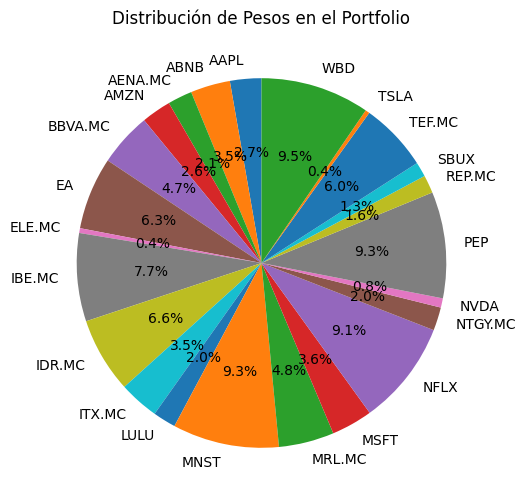

In [ ]:
plt.pie(np.ravel(w_optimal), labels=empresas, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Pesos en el Portfolio')
plt.show()

But getting chunks of shares can be achieved on few trading platforms. Then, for example, we would have to see what is done with NVDA, since its shares have a lot of value and to have 0.8% equivalent to one share of this company, it would have to have at least (assuming a price of 700 per share and which is equivalent to 0.8%) it would have to have 87500.

In [ ]:
w_optimal_flat=np.ravel(w_optimal)
w_optimal_flat

array([0.02743841, 0.03471684, 0.02139762, 0.02598138, 0.04690872,
       0.06337307, 0.00417686, 0.07704446, 0.06589318, 0.03495484,
       0.02005673, 0.09317633, 0.04838571, 0.03603992, 0.09130576,
       0.02036622, 0.00810381, 0.09298709, 0.0157181 , 0.01289784,
       0.06000934, 0.00373422, 0.09533356])

We generate a strtegy for our portfolio